<h3> Curso Ciencia de Datos </h3>
<h1> Sistema de detección de Fraude - Proyecto final para Coderhouse </h1>

<h4> Integrantes : 
<p>
<p> Miguel Rodriguez -> Tutor Maximiliano
<p> Ricardo Vaisman -> Tutor Maximiliano
<p> Federico Sanchez -> Tutor Maximiliano
</h4>


Tabla de contenido 

[Introducción](#Introducción) <br>

Problema a resolver<br>
Contexto<br>
Preguntas y objetivos de la investigación<br>

 
[Data Acquisition](#Data_Acquisition)<br>

Fuente del dataset y criterios de selección<br>
Información sobre el conjunto de datos<br>

    
[Análisis Univariado	](#Análisis_Univariado)<br>

Analisis general<br>
Variable target<br>
Nulos y valores en cero<br>
Correlación de la variable Target<br>
Limpieza variables categóricas<br>
Bar charts<br>
Análisis de frecuencias Categóricas<br>

[Análisis Bivariado	](#Análisis_Bivariado)<br>

Box plots<br>

[Análisis Multivariado	](#Análisis_Multivariado)<br>
[Regresion Logistica para Potenciar el Analisis Multivariado](#Regresion_Logistica_para_Potenciar_el_Analisis_Multivariado)<br>

[Indicadores	](#Indicadores)<br>

[Valores Extremos](#Valores-extremos)<br>

[Algoritmos no supervisados](#Algoritmos-No-supervisados)<br>

[Algoritmos de Clasificación (Dataset Completo)](#Aplicamos--algoritmos-de-clasificaci%C3%B3n-al-Dataset-completo)<br>
[--- Arbol de Decisiones](#Arbol-de-Decisiones)<br>
[--- Random Forest](#Random-Forest)<br>
[--- KNN](#KNN)<br>
[--- XGBoost](#XGBoost)<br>

[Algoritmos de Clasificación (Dataset Reducido)](#Aplicamos-algoritmos-de-clasificaci%C3%B3n-al-Dataset-reducido)<br>
[--- Arbol de Decisiones](#Arbol-de-Decisiones-(Dataset-Reducido))<br>
[--- Random Forest](#Random-Forest---Dataset-reducido)<br>
[--- KNN](#KNN---Dataset-reducido)<br>
[--- XGBoost](#XGBoost----Dataset-reducido)<br>


[Validación de Modelos](#Validacion-de-modelos-y-seleccion)



## Introducción



<h4>Problema a resolver</h4>
Se necesita implementar un sistema de detección de fraudes para transacciones con la criptomoneda Ethereum (ETH).

<h4>Contexto</h4>
Este conjunto de datos contiene filas de fraudes conocidos y transacciones válidas realizadas con Ethereum, un tipo de criptomoneda. 

<h4>Preguntas y objetivos de la investigación</h4>
Entender que variables de las transacciones de ETH dan indicios para creer que una transacción es fraudulenta o no. 




## Data_Acquisition

<h4>Fuente del dataset y criterios de selección</h4>

Ethereum Fraud Detection Dataset
https://www.kaggle.com/vagifa/ethereum-frauddetection-dataset

Seleccionamos el siguiente set datos ya que contaba con una variable TARGET ya definida. Contiene un número considerable de columnas y representa de una manera muy entendible una transacción de ETH.
Posee 9841 registros y 51 columnas lo consideramos es una buena cantidad de información para analizar y crear un modelo de ML.

<h4>Información sobre el conjunto de datos</h4>
 Aquí hay una descripción de las filas del conjunto de datos:
 
<ul> 
<li>Índex: El número de índice de una fila.</li>
<li>Address: la dirección de la cuenta Ethereum.</li>
<li>FLAG: si la transacción es fraude o no.</li>
<li>Avg min between sent tnx: tiempo promedio entre transacciones enviadas para la cuenta en minutos.</li>
<li>Avg min between received tnx: tiempo promedio entre transacciones recibidas para la cuenta en minutos.</li>
<li>Time Diff between first and last (Mins): diferencia de tiempo entre la primera y la última transacción.</li>
<li>Sent Tnx: número total de transacciones normales enviadas</li>
<li>Received Tnx: número total de transacciones normales recibidas</li>
<li>NumberofCreated_Contracts: Número total de transacciones de contrato creadas.</li>
<li>UniqueReceivedFrom_Addresses: Total de direcciones únicas desde las cuales la cuenta recibió transacciones</li>
<li>UniqueSentTo_Addresses20: Total de direcciones únicas desde las cuales la cuenta envió transacciones</li>
<li>MinValueReceived: valor mínimo en Ether recibido alguna vez</li>
<li>MaxValueReceived: valor máximo en Ether recibido alguna vez</li>
<li>AvgValueReceived5Average: Valor promedio en Ether recibido alguna vez</li>
<li>MinValSent: Valor mínimo de Ether jamás enviado</li>
<li>MaxValSent: Valor máximo de Ether jamás enviado</li>
<li>AvgValSent: valor promedio de Ether enviado alguna vez</li>
<li>MinValueSentToContract:  valor mínimo de Ether enviado a un contrato</li>
<li>MaxValueSentToContract: valor máximo de Ether enviado a un contrato</li>
<li>AvgValueSentToContract: valor promedio de Ether enviado a contratos</li>
<li>TotalTransactions(IncludingTnxtoCreate_Contract):  número total de transacciones</li>
<li>TotalEtherSent:Ether total enviado para la dirección de la cuenta</li>
<li>TotalEtherReceived: Ether total recibido para la dirección de la cuenta</li>
<li>TotalEtherSent_Contracts: Total Ether enviado a direcciones de contrato</li>
<li>TotalEtherBalance: Saldo total de Ether después de las transacciones promulgadas</li>
<li>TotalERC20Tnxs: número total de transacciones de transferencia de token ERC20</li>
<li>ERC20TotalEther_Received: Total de transacciones recibidas del token ERC20 en Ether</li>
<li>ERC20TotalEther_Sent: Total de transacciones ERC20token enviadas en Ether</li>
<li>ERC20TotalEtherSentContract: transferencia de token ERC20 total a otros contratos en Ether</li>
<li>ERC20UniqSent_Addr:  número de transacciones de token ERC20 enviadas a direcciones de cuenta únicas</li>
<li>ERC20UniqRec_Addr:  número de transacciones de token ERC20 recibidas de direcciones únicas</li>
<li>ERC20UniqRecContractAddr: número de transacciones de token ERC20 recibidas de direcciones de contrato únicas</li>
<li>ERC20AvgTimeBetweenSent_Tnx: tiempo promedio entre transacciones enviadas con token ERC20 en minutos</li>
<li>ERC20AvgTimeBetweenRec_Tnx: tiempo promedio entre transacciones recibidas del token ERC20 en minutos</li>
<li>ERC20AvgTimeBetweenContract_Tnx: tiempo promedio del token ERC20 entre transacciones de token enviadas</li>
<li>ERC20MinVal_Rec: valor mínimo en Ether recibido de las transacciones de token ERC20 para la cuenta</li>
<li>ERC20MaxVal_Rec: valor máximo en Ether recibido de las transacciones de token ERC20 para la cuenta</li>
<li>ERC20AvgVal_Rec: valor promedio en Ether recibido de las transacciones de token ERC20 para la cuenta</li>
<li>ERC20MinVal_Sent: valor mínimo en Ether enviado desde transacciones de token ERC20 para la cuenta</li>
<li>ERC20MaxVal_Sent: valor máximo en Ether enviado desde transacciones de token ERC20 para cuenta</li>
<li>ERC20AvgVal_Sent: valor promedio en Ether enviado desde transacciones de token ERC20 para la cuenta</li>
<li>ERC20UniqSentTokenName: número de tokens ERC20 únicos transferidos</li>
<li>RC20UniqRecTokenName: número de tokens ERC20 únicos recibidos</li>
<li>ERC20MostSentTokenType:token más enviado para la cuenta a través de la transacción ERC20</li>
<li>ERC20MostRecTokenType:  token más recibido para la cuenta a través de transacciones ERC20
    
</ul>


In [154]:
#Importo librerias
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
import xgboost as xgb

from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

#Sklear Decision Tree y Random Forest


#Importo libreria para medir los algoritmos
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

%matplotlib inline

#Set de datos utilizado para el proyecto de Fraude 

df = pd.read_csv('transaction_dataset.csv')

#Data frame para regresion logistica
df_RL = df.copy()

print(df.shape)
df.head()##

(9841, 51)


,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


## Análisis_Univariado


## Analisis general

In [155]:
#Info generica del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [156]:
# df.drop(['Unnamed: 0', 'Index', 'Address'], inplace=True, axis=1)

En el análisis general vemos que tenemos 51 variables, de estas solo <b>FLAG, ERC20 most sent token type y ERC20_most_rec_token_type</b> son variables categóricas. 

Las variables <b>Unnamed:0, Index y Address </b> no se van a utilizar ya que son variables que o son índices o el address de la cuenta que no tienen ninguna relación con nuestra variable objetivo. 

In [157]:
#Genero estadisticas simples
df.describe()

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,4920.000000,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,2840.996333,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,2460.000000,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,4920.000000,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,7380.000000,2601.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,9840.000000,4729.000000,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


Después se hizo un df.describe() sobre las variables continuas, y encontramos algo muy curioso en algunas variables y es que desde el percentil 25 al 75 el valor es cero, esto nos está diciendo que para algunas variables el 75% o más de los datos son un cero. Más adelante se hará el análisis a fondo de esta variables.  


## Variable target


In [158]:
print(f'Procentaje de transacciones no fraudulentas : {len(df.loc[df["FLAG"]==0])/len(df["FLAG"])*100}')
print(f'Procentaje de transacciones fraudulentas : {len(df.loc[df["FLAG"]==1])/len(df["FLAG"])*100}')

Procentaje de transacciones no fraudulentas : 77.85794126613149
Procentaje de transacciones fraudulentas : 22.14205873386851


Text(0.5, 1.0, 'Distribucion de la columna Target')

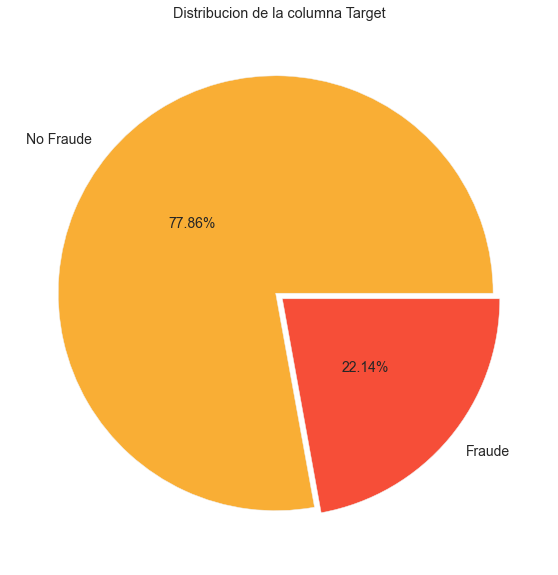

In [159]:
pie, ax = plt.subplots(figsize=[15,10])
labels = ['No Fraude', 'Fraude']
colors = ['#f9ae35', '#f64e38']
plt.pie(x = df['FLAG'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Distribucion de la columna Target')


#TODO no se por que no me lo muestra

En nuestra variable target tenemos 2179 ejemplos de fraude y 9841 ejemplos totales, lo que nos da un 22% de ejemplos de fraude en el data set. Esto quiere decir que tenemos un dataset desbalanceado y que antes de hacer el modelo tendremos que emplear alguna técnica para balancear o si no podemos entrenar el modelo a pensar que todos los casos no son fraude. 


## Nulos y valores en cero

<p>Nulos y valores en cero
<p>Se hizo un conteo de nulos y valores diferente a cero para cada una de las variables, esto ya que como vimos en el cuadro de describe habían unas variables que el el percentil 75 tenían cero, lo que nos da la idea de que esas variables pueden solo tenemos valores en cero y no aportar información al modelo. 



In [160]:
percent_missing = df.isnull().sum() / len(df) * 100
df_summary = percent_missing.to_frame(name='null percent')

# Cuenta los valores que no son ceros 
non_zeros = (df[:] != 0).sum()/ len(df) * 100
df_summary2 = non_zeros.to_frame(name='non-zero percent')

df_summary = df_summary.merge(df_summary2, left_index=True, right_index=True)
df_summary['non-null non-zero'] = df_summary['non-zero percent'] - df_summary['null percent']
df_summary.sort_values(by='non-null non-zero')

,null percent,non-zero percent,non-null non-zero
ERC20 avg time between contract tnx,8.423941,8.423941,0.000000
ERC20 avg time between rec 2 tnx,8.423941,8.423941,0.000000
ERC20 avg time between rec tnx,8.423941,8.423941,0.000000
ERC20 avg time between sent tnx,8.423941,8.423941,0.000000
ERC20 avg val sent contract,8.423941,8.423941,0.000000
ERC20 max val sent contract,8.423941,8.423941,0.000000
ERC20 min val sent contract,8.423941,8.423941,0.000000
min value sent to contract,0.000000,0.020323,0.020323
total ether sent contracts,0.000000,0.030485,0.030485
avg value sent to contract,0.000000,0.030485,0.030485


In [161]:
#Dropeamos las columnas que son insignificativas y no aportan valor. 
columns = ['Unnamed: 0', 'Index', 'Address',' ERC20 avg time between contract tnx',
' ERC20 avg time between rec 2 tnx',
' ERC20 avg val sent contract',
' ERC20 max val sent contract',
' ERC20 min val sent contract',
' ERC20 avg time between rec tnx',
' ERC20 avg time between sent tnx',
'min value sent to contract',
'total ether sent contracts',
'avg value sent to contract',
'max val sent to contract',
' ERC20 total Ether sent contract',
' ERC20 uniq sent addr.1']

df_copy = df
df.drop(columns, axis =1 , inplace = True)

Como se puede observar las primeras 13 variables de esta lista tienen menos del 0.3% de valores distintos a cero o nulo, es decir menos de 30 datos en un dataset de 9841 registros. Consideramos que estas variables no deberían entrar en el modelo porque no aportan información al problema ya que más del 99,7% de los datos van a ser nulos o cero. 

Además observamos que las variables que tienen valores nulos son las de ERC20 que es un protocolo de ETH. Lo que parece indicarnos que esas cuentas no hicieron ninguna transacción por ese protocolo. Con esto pensamos agregar otra variables que indique si tiene información sobre las transacciones ERC20 o no. 


#  Correlacion de la variable Target

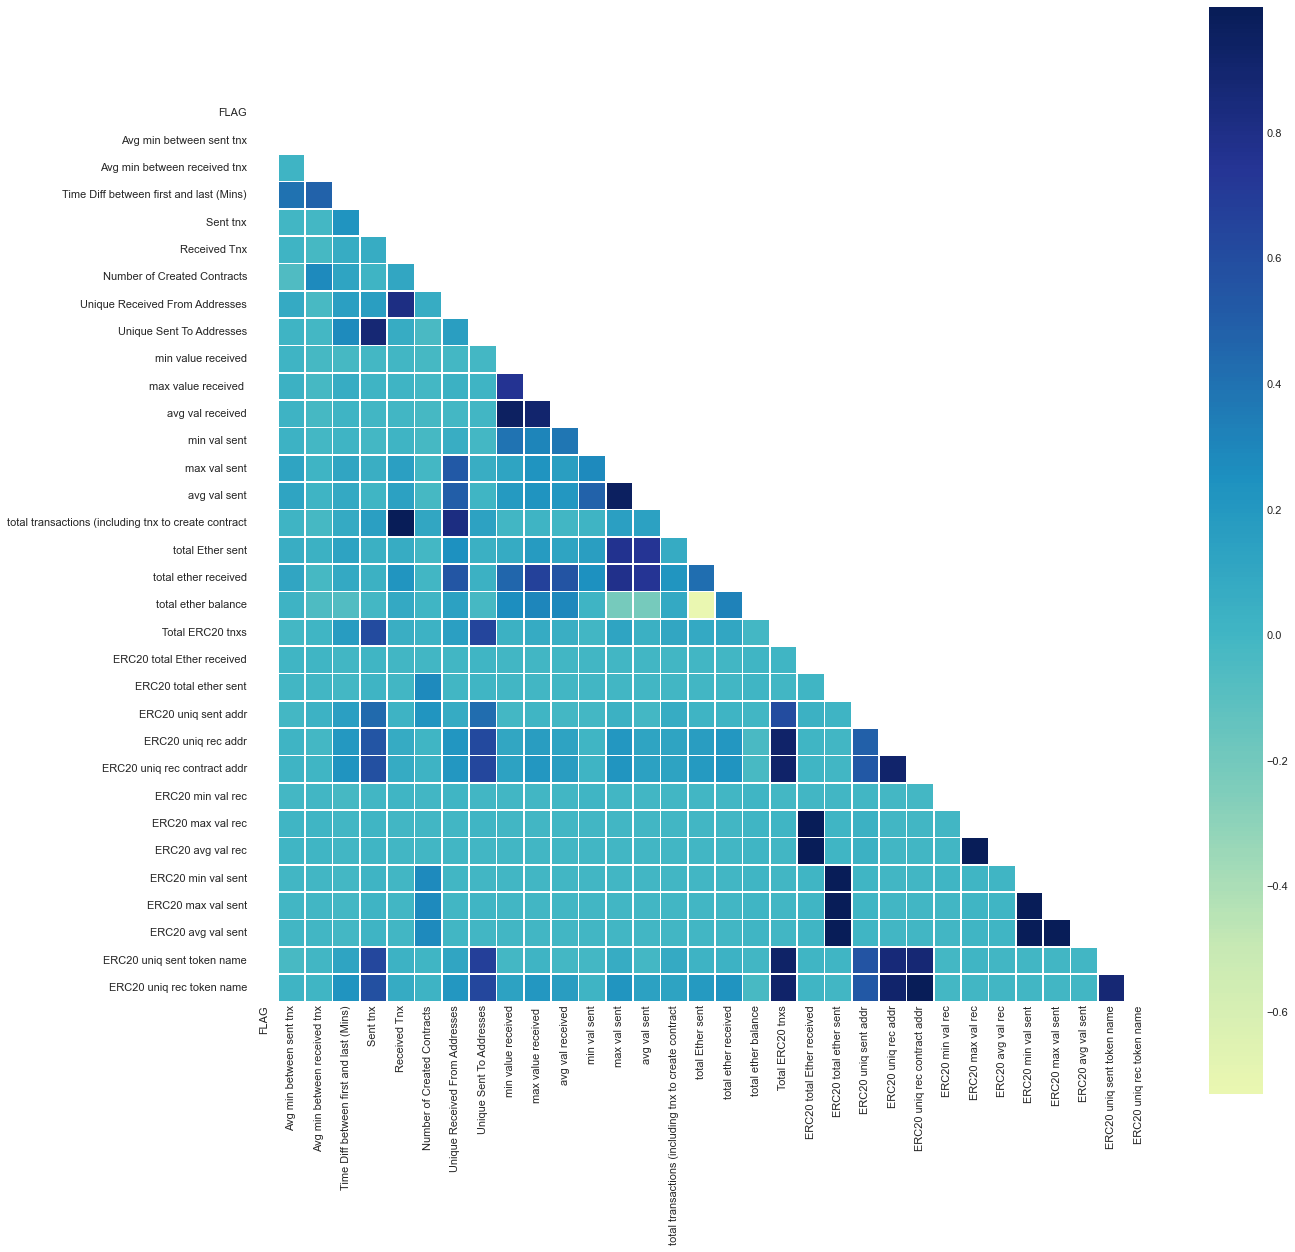

In [162]:
# Correlacion para Fraudes
df_fraud = df[df['FLAG']==1]
corr = df_fraud.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,20))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='YlGnBu',center=0, linewidths=0.8, square=True)

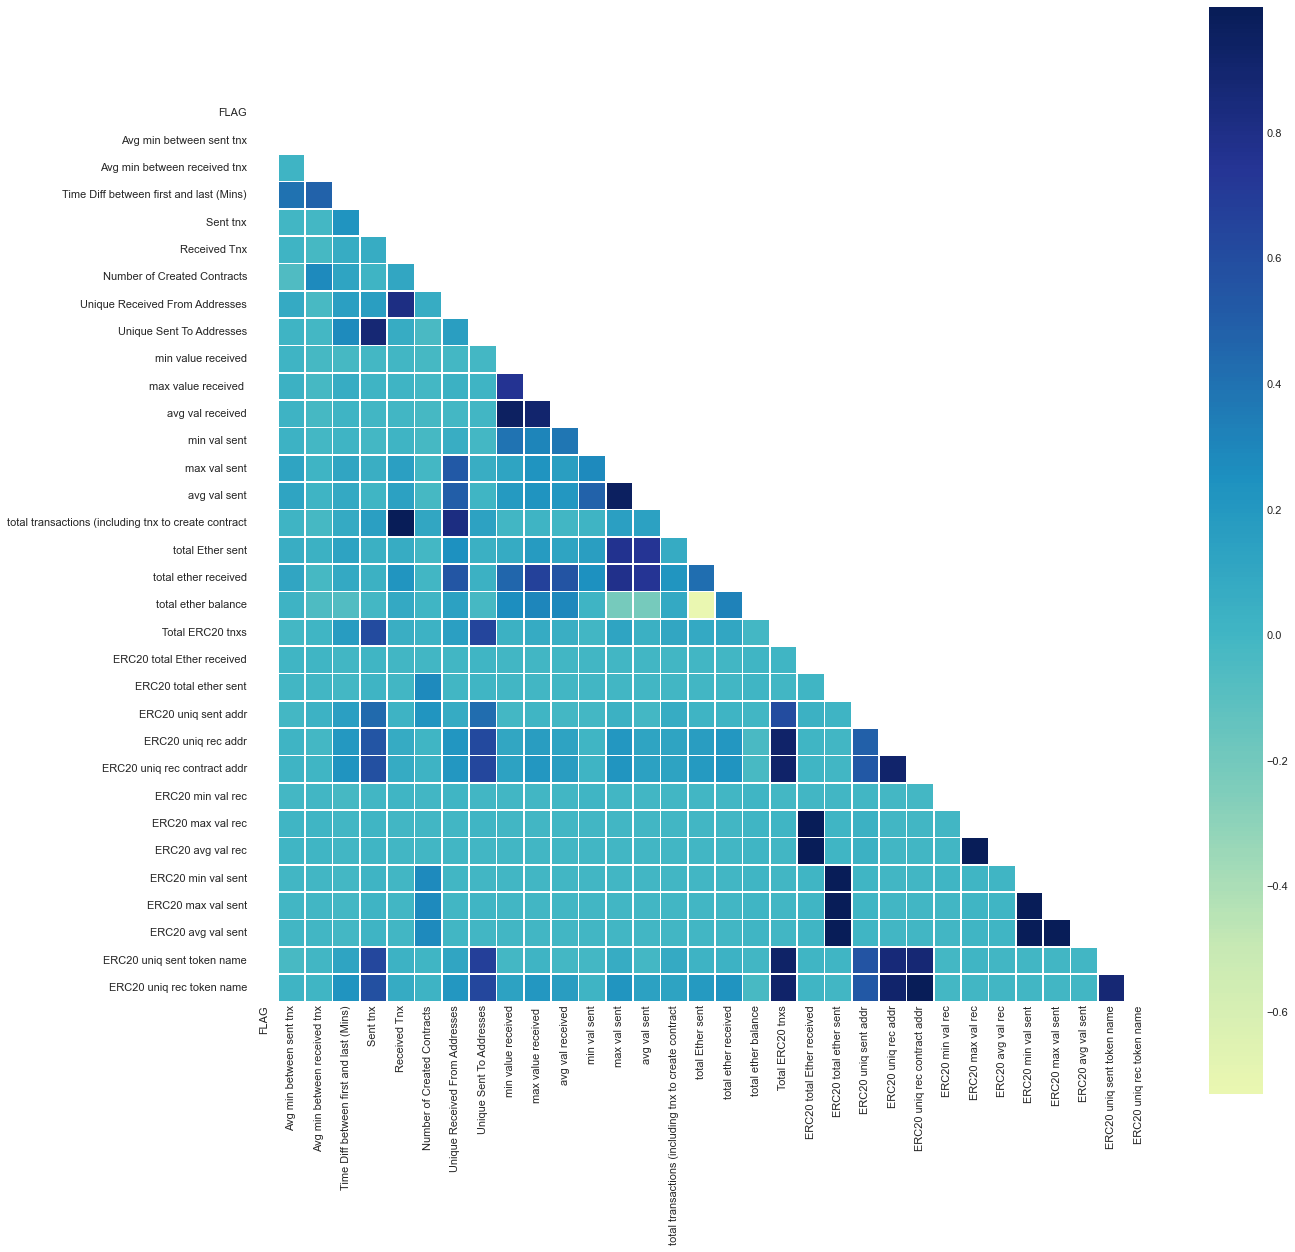

In [163]:
# Correlacion para NO Fraudes
df_not_fraud = df[df['FLAG']==0]
corr = df_fraud.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,20))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='YlGnBu',center=0, linewidths=0.8, square=True)

Podemos observar las distintas correlaciones que tienen las variables entre sí para un Fraude o una transacción sin Fraude. Tenemos una fuerte correlación en variables que representa el protocolo de ETH.



## Limpieza variables categóricas


In [164]:
#cambiar los valores 0 a nulos, porque un valor 0 no significa nada en las variables categóricas
df[' ERC20_most_rec_token_type'].replace({'0':np.NaN},inplace = True)
df[' ERC20 most sent token type'].replace({'0':np.NaN},inplace = True)

In [165]:
#Promedio de Nan
print(df[' ERC20 most sent token type'].isnull().sum()/len(df))
print(df[' ERC20 most sent token type'].max)

0.5324662127832538
<bound method NDFrame._add_numeric_operations.<locals>.max of 0            Cofoundit
1       Livepeer Token
2                 None
3               Raiden
4        StatusNetwork
             ...      
9836                  
9837                  
9838                  
9839               NaN
9840                  
Name:  ERC20 most sent token type, Length: 9841, dtype: object>


In [166]:
##Promedio de Nan
print(df[' ERC20_most_rec_token_type'].isnull().sum()/len(df))
print(df[' ERC20_most_rec_token_type'].max)

0.5334823696778782
<bound method NDFrame._add_numeric_operations.<locals>.max of 0                              Numeraire
1                         Livepeer Token
2                                  XENON
3                                  XENON
4                                    EOS
                      ...               
9836                          GSENetwork
9837               Blockwell say NOTSAFU
9838    Free BOB Tokens - BobsRepair.com
9839                                 NaN
9840                          INS Promo1
Name:  ERC20_most_rec_token_type, Length: 9841, dtype: object>


Para los siguientes variables categóricas reemplazamos el valor ‘0’ por Nan
ERC20_most_rec_token_type
ERC20 most sent token type

Consideramos que tiene más sentido para una variable categórica que tenga un valor null a un valor numérico para representar la nada.


## Bar charts

<p>En los Bar charts podemos observar que la mayoría de los valores tienen un mismo valor.
    <p>
        <p>
            

array([[<AxesSubplot:title={'center':'FLAG'}>,
        <AxesSubplot:title={'center':'Avg min between sent tnx'}>,
        <AxesSubplot:title={'center':'Avg min between received tnx'}>,
        <AxesSubplot:title={'center':'Time Diff between first and last (Mins)'}>,
        <AxesSubplot:title={'center':'Sent tnx'}>,
        <AxesSubplot:title={'center':'Received Tnx'}>],
       [<AxesSubplot:title={'center':'Number of Created Contracts'}>,
        <AxesSubplot:title={'center':'Unique Received From Addresses'}>,
        <AxesSubplot:title={'center':'Unique Sent To Addresses'}>,
        <AxesSubplot:title={'center':'min value received'}>,
        <AxesSubplot:title={'center':'max value received '}>,
        <AxesSubplot:title={'center':'avg val received'}>],
       [<AxesSubplot:title={'center':'min val sent'}>,
        <AxesSubplot:title={'center':'max val sent'}>,
        <AxesSubplot:title={'center':'avg val sent'}>,
        <AxesSubplot:title={'center':'total transactions (including 

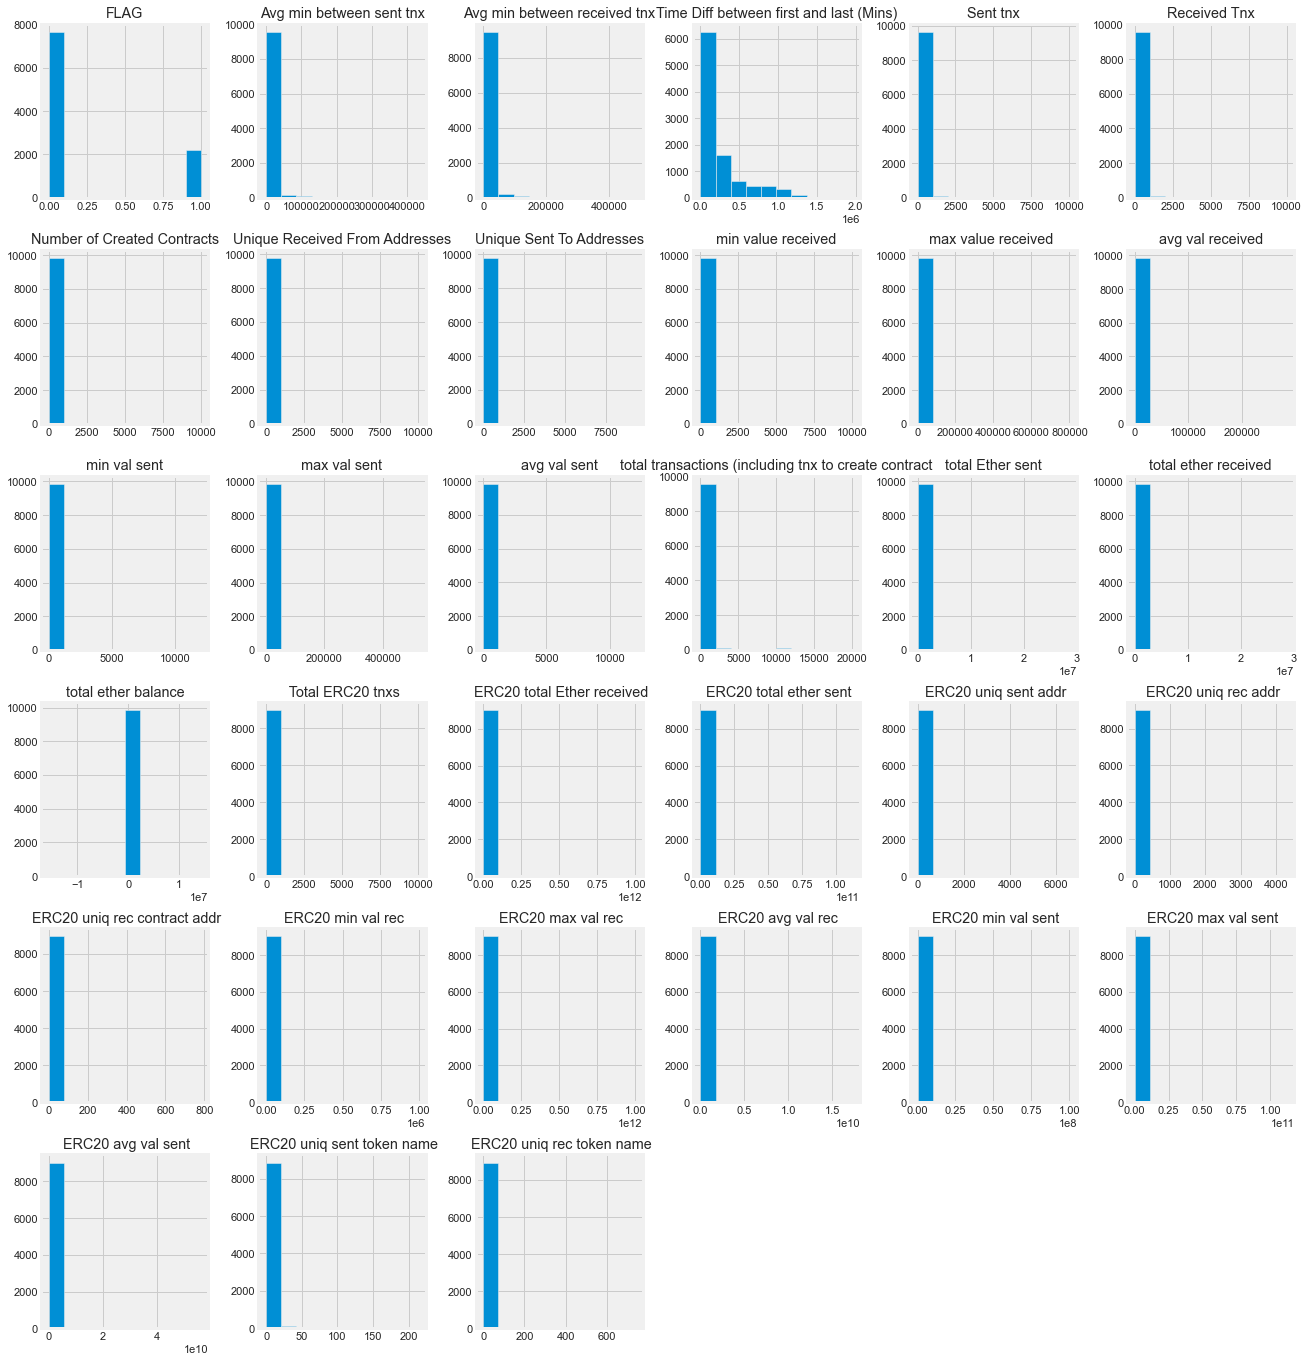

In [167]:
#Genero un grafico para columna , en la cual puedo observar la cantidad de sus distintos valores.
df.hist(figsize=(20,24), bins=10)

Como varias variables tienen una gran densidad de datos cerca de los valores a cero, estamos pensando en hacer dos tipos de modelos. uno que incluya esos valores extremos y otro sin esos valores extremos para ver cómo se comportan los modelos.

## Análisis de frecuencias Categóricas

<p>Variable : ERC20 most sent token type
<p>
<p>


In [168]:
# ERC20 most sent token type
frec = df[' ERC20 most sent token type'].value_counts()
frec_df = pd.DataFrame(frec)
frec_df.rename(columns={' ERC20 most sent token type':'Frec_abs'},inplace=True)
#Obtenemos los valores de las Frecuencias Absolutas
Frec_abs_val = frec_df["Frec_abs"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias absolutas acumuladas
acum = []

#Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias absolutas para irlas sumando
for i in Frec_abs_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_abs_acum"] = acum

#Calculamos la Frecuencia Relativa en %
frec_df["frec_rel_%"] = 100 * frec_df["Frec_abs"]/len(df[' ERC20 most sent token type'])

#Obtenemos los valores de las Frecuencias Relativas
Frec_rel_val = frec_df["frec_rel_%"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias relativas acumuladas
acum = []

#Iniciamos una variable  en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias relativas para irlas sumando
for i in Frec_rel_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_rel_%_acum"] = acum
frec_df

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
None,1856,1856,18.859872,18.859872
,1191,3047,12.102429,30.962301
EOS,138,3185,1.402297,32.364597
OmiseGO,137,3322,1.392135,33.756732
Golem,130,3452,1.321004,35.077736
...,...,...,...,...
Authorship,1,4597,0.010162,46.712732
Litecoin One,1,4598,0.010162,46.722894
eBTC,1,4599,0.010162,46.733056
BANKEX,1,4600,0.010162,46.743217


<p>Variable : ERC20_most_rec_token_type
<p>
<p>

In [169]:
#' ERC20 most sent token type'
frec = df[' ERC20_most_rec_token_type'].value_counts()
frec_df = pd.DataFrame(frec)
frec_df.rename(columns={' ERC20_most_rec_token_type':'Frec_abs'},inplace=True)
#Obtenemos los valores de las Frecuencias Absolutas
Frec_abs_val = frec_df["Frec_abs"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias absolutas acumuladas
acum = []

#Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias absolutas para irlas sumando
for i in Frec_abs_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_abs_acum"] = acum

#Calculamos la Frecuencia Relativa en %
frec_df["frec_rel_%"] = 100 * frec_df["Frec_abs"]/len(df[' ERC20_most_rec_token_type'])

#Obtenemos los valores de las Frecuencias Relativas
Frec_rel_val = frec_df["frec_rel_%"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias relativas acumuladas
acum = []

#Iniciamos una variable  en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias relativas para irlas sumando
for i in Frec_rel_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_rel_%_acum"] = acum
frec_df

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
OmiseGO,873,873,8.871050,8.871050
Blockwell say NOTSAFU,779,1652,7.915862,16.786912
DATAcoin,358,2010,3.637842,20.424754
Livepeer Token,207,2217,2.103445,22.528198
EOS,161,2378,1.636013,24.164211
...,...,...,...,...
MATRIX AI Network,1,4587,0.010162,46.611117
FXPay,1,4588,0.010162,46.621278
Blockchain Certified Data Token,1,4589,0.010162,46.631440
E4ROW,1,4590,0.010162,46.641601


<p>Para las 2 variables categóricas podemos observar que la frecuencia es en promedio baja.
    <p>
        <p>

In [170]:
df.columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 uniq sent addr',
       ' ERC20 uniq rec addr', ' ERC20 uniq rec contract addr',
       ' ERC20 min val rec', ' ERC20 max val rec', ' ERC20 avg val rec',
       ' ERC20 min val sent', ' ERC20 max val sent', ' ERC20 avg val sent',
       ' ERC20 uniq sent token name', ' ERC20 uniq rec token name',
       ' ERC20 most sent token type', ' ERC20_most_rec_token_type'],
      dtype='ob

<ipython-input-171-6d75148492e6>:16: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.subplots_adjust(wspace = 0.7, hspace=0.8)


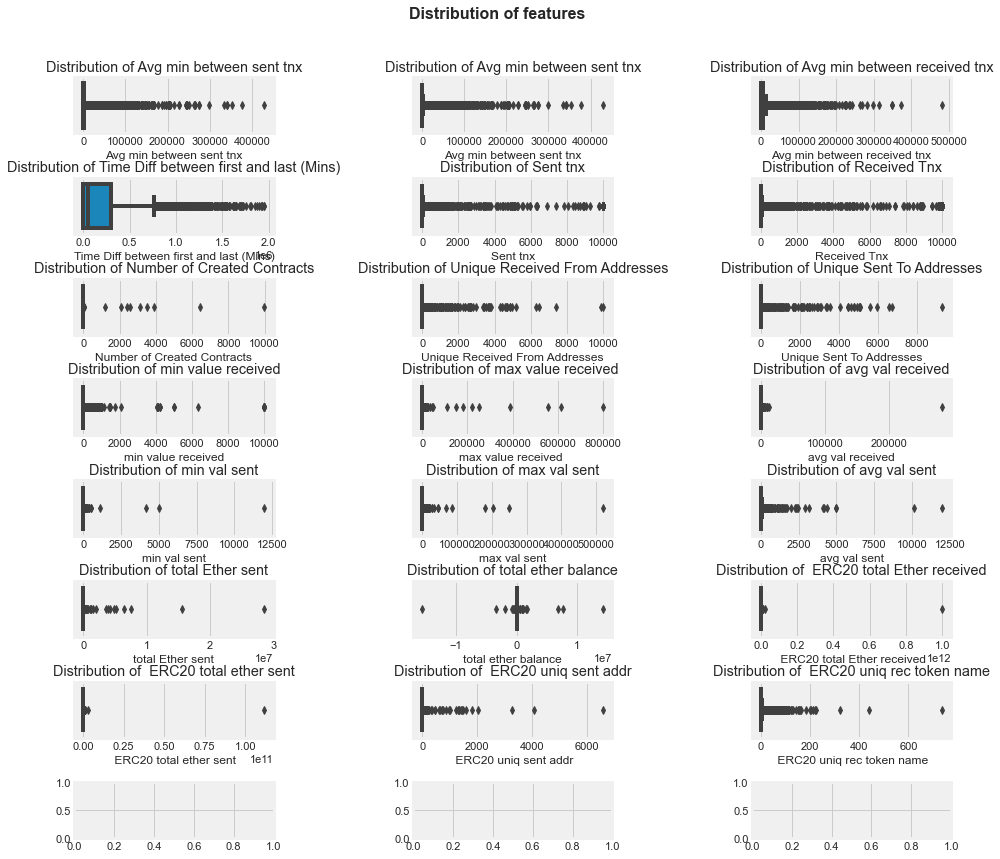

In [171]:
# Analisis de la distribucion usando boxplots
columns = ['FLAG', 'Avg min between sent tnx', 
           'Avg min between sent tnx','Avg min between received tnx',  
           'Time Diff between first and last (Mins)', 'Sent tnx', 
           'Received Tnx', 'Number of Created Contracts', 
           'Unique Received From Addresses', 'Unique Sent To Addresses', 
           'min value received', 'max value received ', 'avg val received',
           'min val sent', 'max val sent', 'avg val sent',
            'total Ether sent', 
           'total ether balance', ' ERC20 total Ether received', 
           ' ERC20 total ether sent', ' ERC20 uniq sent addr', ' ERC20 uniq rec token name']

       

fig, axes = plt.subplots(8, 3, figsize=(14, 14), constrained_layout =True)
plt.subplots_adjust(wspace = 0.7, hspace=0.8)
plt.suptitle("Distribution of features",y=0.95, size=16, weight='bold')

ax = sns.boxplot(ax = axes[0,0], data=df_copy, x=columns[1])
ax.set_title(f'Distribution of {columns[1]}')

ax1 = sns.boxplot(ax = axes[0,1], data=df_copy, x=columns[2])
ax1.set_title(f'Distribution of {columns[2]}')

ax2 = sns.boxplot(ax = axes[0,2], data=df_copy, x=columns[3])
ax2.set_title(f'Distribution of {columns[3]}')

ax3 = sns.boxplot(ax = axes[1,0], data=df_copy, x=columns[4])
ax3.set_title(f'Distribution of {columns[4]}')

ax4 = sns.boxplot(ax = axes[1,1], data=df_copy, x=columns[5])
ax4.set_title(f'Distribution of {columns[5]}')

ax5 = sns.boxplot(ax = axes[1,2], data=df_copy, x=columns[6])
ax5.set_title(f'Distribution of {columns[6]}')

ax6 = sns.boxplot(ax = axes[2,0], data=df_copy, x=columns[7])
ax6.set_title(f'Distribution of {columns[7]}')

ax7 = sns.boxplot(ax = axes[2,1], data=df_copy, x=columns[8])
ax7.set_title(f'Distribution of {columns[8]}')

ax8 = sns.boxplot(ax = axes[2,2], data=df_copy, x=columns[9])
ax8.set_title(f'Distribution of {columns[9]}')

ax9 = sns.boxplot(ax = axes[3,0], data=df_copy, x=columns[10])
ax9.set_title(f'Distribution of {columns[10]}')
 
ax10 = sns.boxplot(ax = axes[3,1], data=df_copy, x=columns[11])
ax10.set_title(f'Distribution of {columns[11]}')

ax11 = sns.boxplot(ax = axes[3,2], data=df_copy, x=columns[12])
ax11.set_title(f'Distribution of {columns[12]}')
 
ax12 = sns.boxplot(ax = axes[4,0], data=df_copy, x=columns[13])
ax12.set_title(f'Distribution of {columns[13]}')
 
ax13 = sns.boxplot(ax = axes[4,1], data=df_copy, x=columns[14])
ax13.set_title(f'Distribution of {columns[14]}')
 
ax14 = sns.boxplot(ax = axes[4,2], data=df_copy, x=columns[15])
ax14.set_title(f'Distribution of {columns[15]}')
 
ax15 = sns.boxplot(ax = axes[5,0], data=df_copy, x=columns[16])
ax15.set_title(f'Distribution of {columns[16]}')

ax15 = sns.boxplot(ax = axes[5,1], data=df_copy, x=columns[17])
ax15.set_title(f'Distribution of {columns[17]}')

ax15 = sns.boxplot(ax = axes[5,2], data=df_copy, x=columns[18])
ax15.set_title(f'Distribution of {columns[18]}')

ax15 = sns.boxplot(ax = axes[6,0], data=df_copy, x=columns[19])
ax15.set_title(f'Distribution of {columns[19]}')

ax15 = sns.boxplot(ax = axes[6,1], data=df_copy, x=columns[20])
ax15.set_title(f'Distribution of {columns[20]}')

ax15 = sns.boxplot(ax = axes[6,2], data=df_copy, x=columns[21])
ax15.set_title(f'Distribution of {columns[21]}')


 

plt.show()

La gran mayoría de la dispersión tiene más al valor cero. Es una particularidad que se da en la mayoría de las variables

## Análisis_Bivariado


<AxesSubplot:xlabel='FLAG', ylabel=' ERC20 min val rec'>

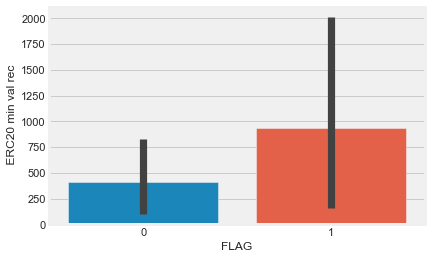

In [172]:
# FLAG VS ERC20 min val rec
sns.barplot(x='FLAG' , y = " ERC20 min val rec", data=df)

<AxesSubplot:xlabel='FLAG', ylabel=' ERC20 max val rec'>

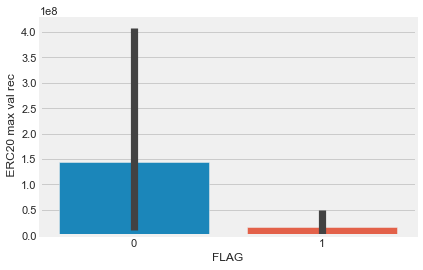

In [173]:
# Flag vs ERC20 max val rec
sns.barplot(x='FLAG' , y = " ERC20 max val rec", data=df)

<AxesSubplot:xlabel='FLAG', ylabel=' ERC20 avg val rec'>

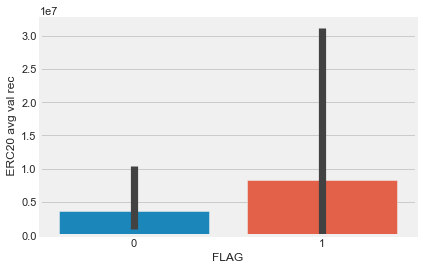

In [174]:
#Flag vs ERC20 avg val rec
sns.barplot(x='FLAG' , y = " ERC20 avg val rec", data=df)

<AxesSubplot:xlabel='FLAG', ylabel=' ERC20 min val sent'>

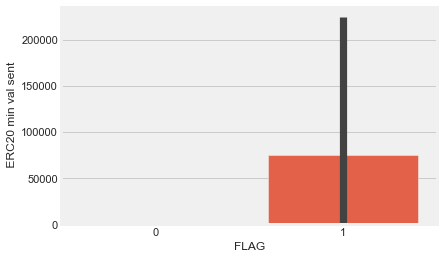

In [175]:
# Flag vs ER20 MIN VAL SENT
sns.barplot(x='FLAG' , y = " ERC20 min val sent", data=df)

<AxesSubplot:xlabel='FLAG', ylabel=' ERC20 max val sent'>

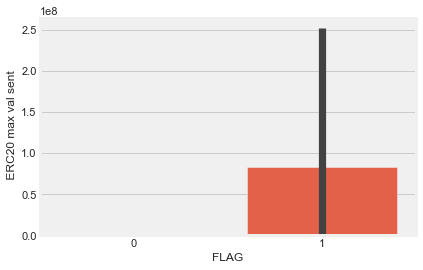

In [176]:
# Flag vs ERC20 max val sent
sns.barplot(x='FLAG' , y = " ERC20 max val sent", data=df)

<AxesSubplot:xlabel='FLAG', ylabel=' ERC20 avg val sent'>

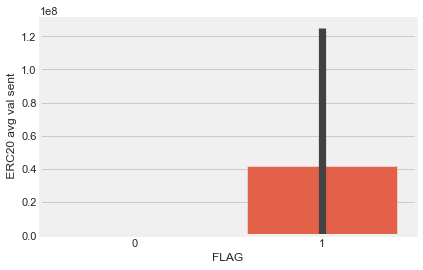

In [177]:
#FLAG vs ERC20 avg val sent
sns.barplot(x='FLAG' , y = " ERC20 avg val sent", data=df)

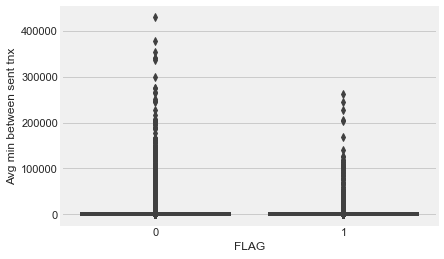

In [178]:
sns.boxplot(x='FLAG', y='Avg min between sent tnx', data=df)

plt.show()

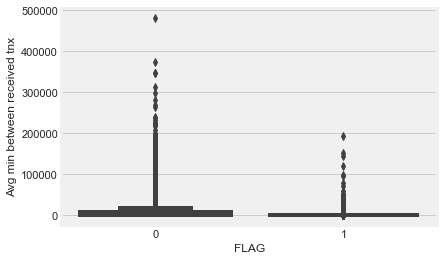

In [179]:
sns.boxplot(x='FLAG', y='Avg min between received tnx', data=df)

plt.show()

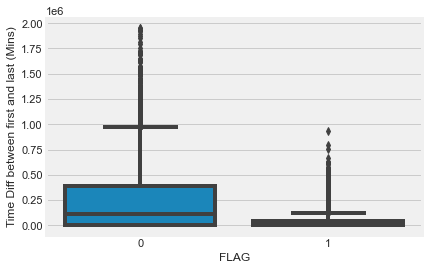

In [180]:
sns.boxplot(x='FLAG', y='Time Diff between first and last (Mins)', data=df)

plt.show()

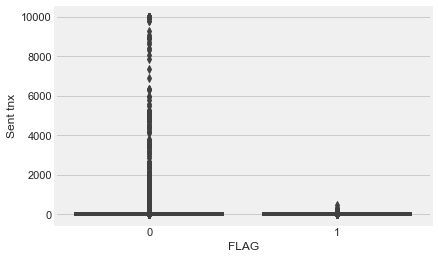

In [181]:
sns.boxplot(x='FLAG', y='Sent tnx', data=df)

plt.show()

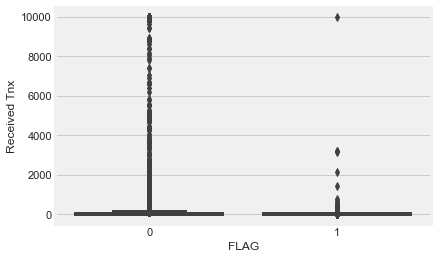

In [182]:
sns.boxplot(x='FLAG', y='Received Tnx', data=df)

plt.show()

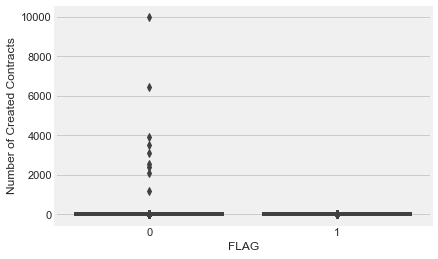

In [183]:
sns.boxplot(x='FLAG', y='Number of Created Contracts', data=df)

plt.show()

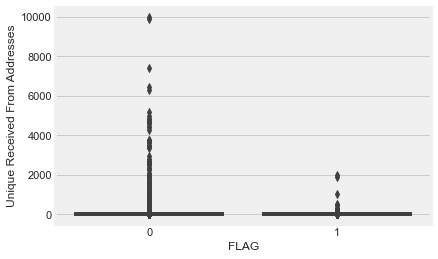

In [184]:
sns.boxplot(x='FLAG', y='Unique Received From Addresses', data=df)

plt.show() 

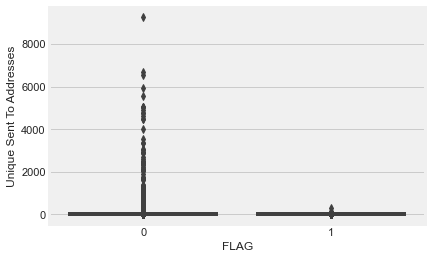

In [185]:
sns.boxplot(x='FLAG', y='Unique Sent To Addresses', data=df)

plt.show() 

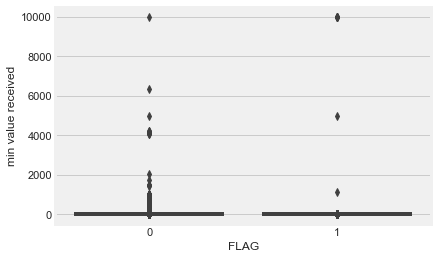

In [186]:
sns.boxplot(x='FLAG', y='min value received', data=df)

plt.show() 

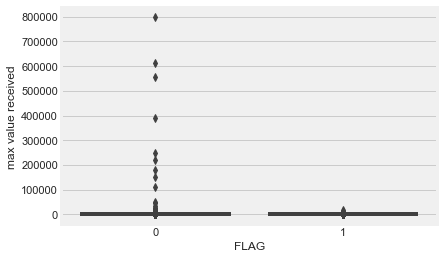

In [187]:
sns.boxplot(x='FLAG', y='max value received ', data=df)

plt.show() 

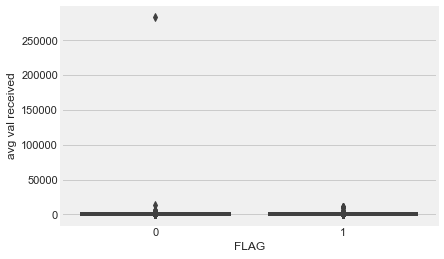

In [188]:
sns.boxplot(x='FLAG', y='avg val received', data=df)

plt.show() 

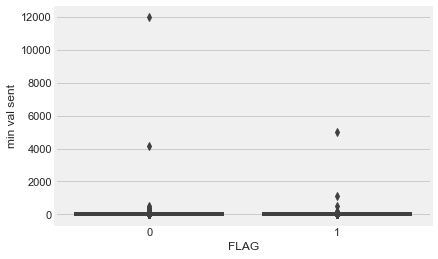

In [189]:
sns.boxplot(x='FLAG', y='min val sent', data=df)

plt.show() 

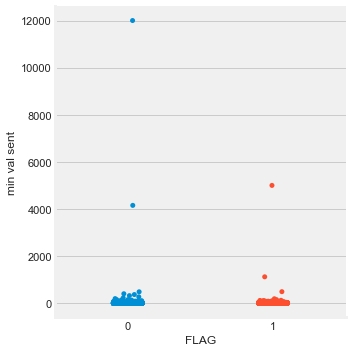

In [190]:
sns.catplot(x='FLAG', y='min val sent', data=df)

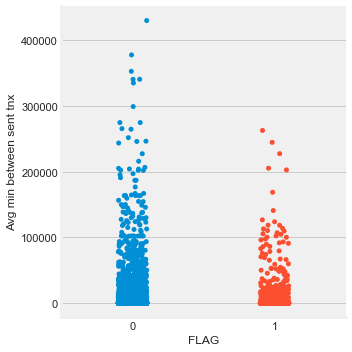

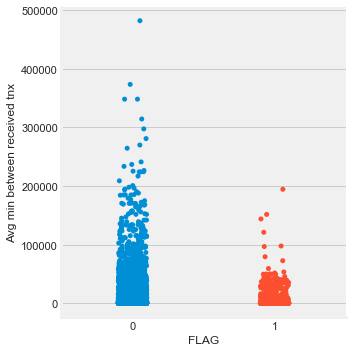

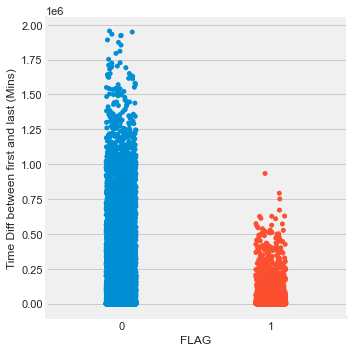

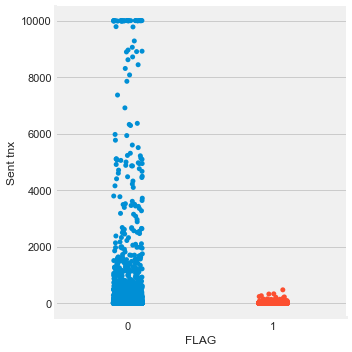

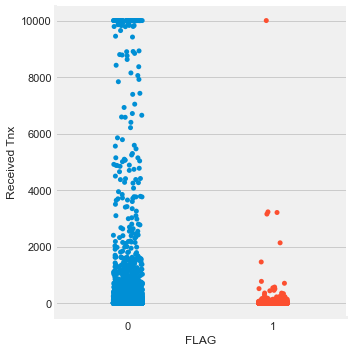

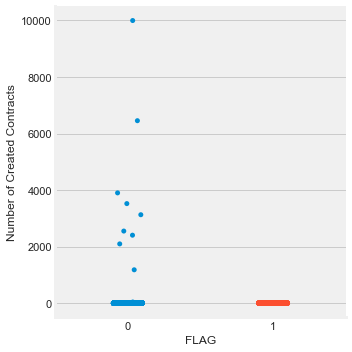

In [191]:
sns.catplot(x='FLAG', y='Avg min between sent tnx', data=df)

plt.show()

sns.catplot(x='FLAG', y='Avg min between received tnx', data=df)

plt.show()

sns.catplot(x='FLAG', y='Time Diff between first and last (Mins)', data=df)

plt.show()

sns.catplot(x='FLAG', y='Sent tnx', data=df)

plt.show()

sns.catplot(x='FLAG', y='Received Tnx', data=df)

plt.show()

sns.catplot(x='FLAG', y='Number of Created Contracts', data=df)

plt.show()



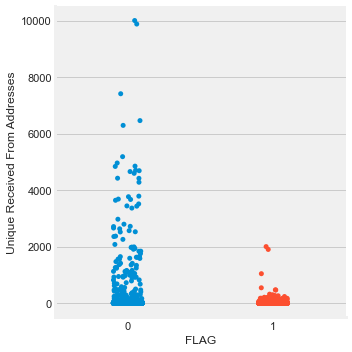

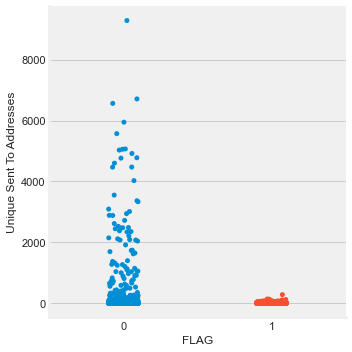

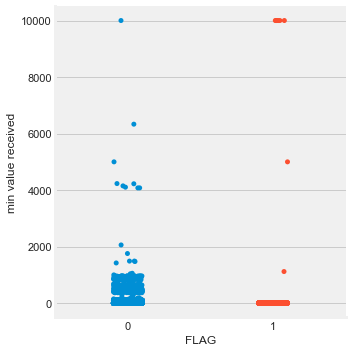

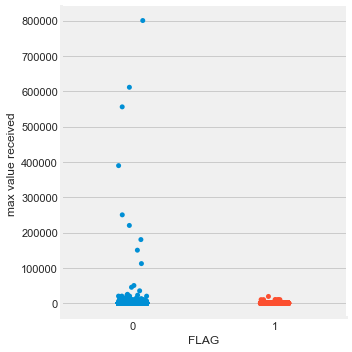

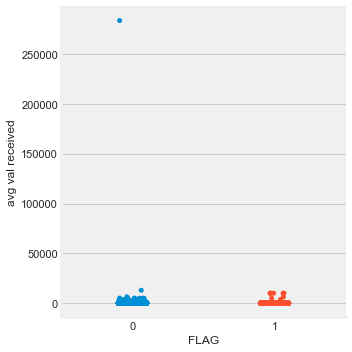

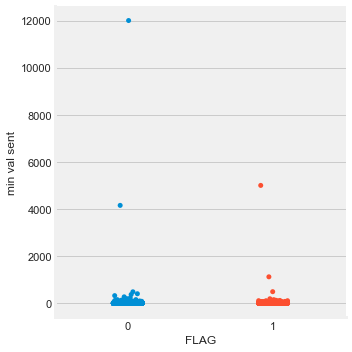

In [192]:
sns.catplot(x='FLAG', y='Unique Received From Addresses', data=df)
plt.show() 

sns.catplot(x='FLAG', y='Unique Sent To Addresses', data=df)
plt.show() 

sns.catplot(x='FLAG', y='min value received', data=df)
plt.show() 

sns.catplot(x='FLAG', y='max value received ', data=df)
plt.show() 

sns.catplot(x='FLAG', y='avg val received', data=df)
plt.show() 

sns.catplot(x='FLAG', y='min val sent', data=df)
plt.show() 

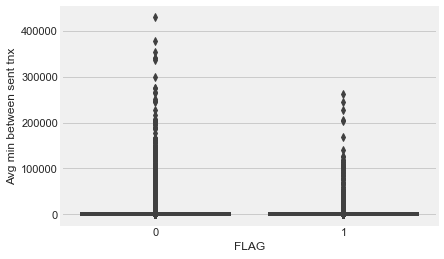

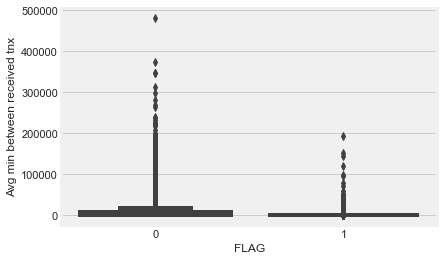

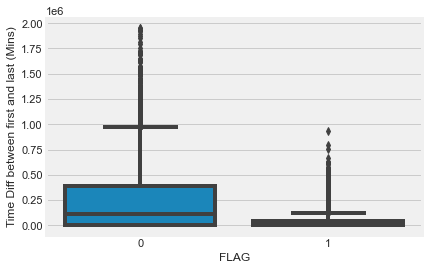

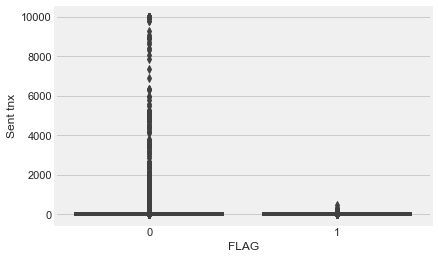

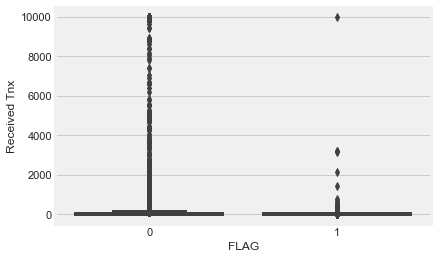

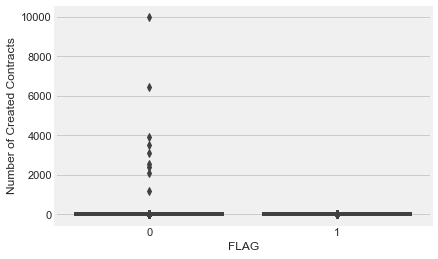

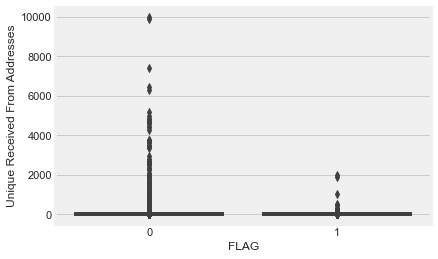

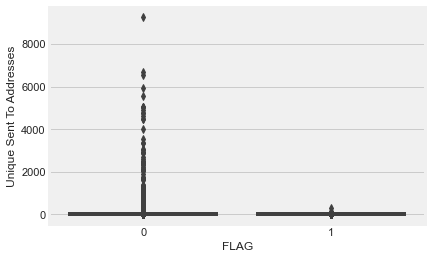

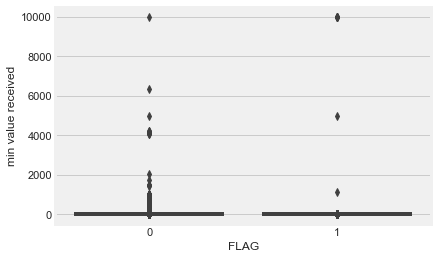

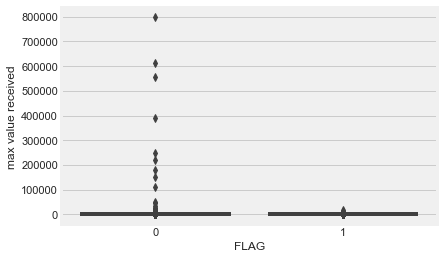

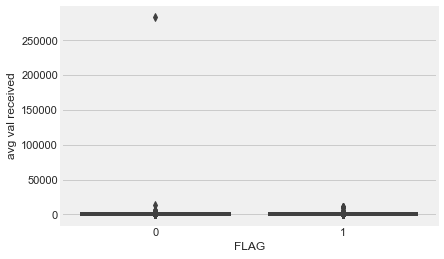

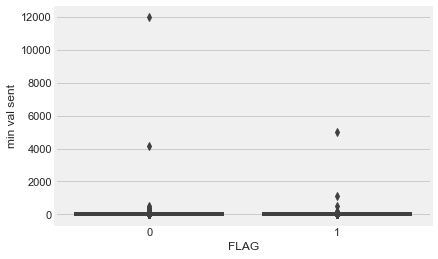

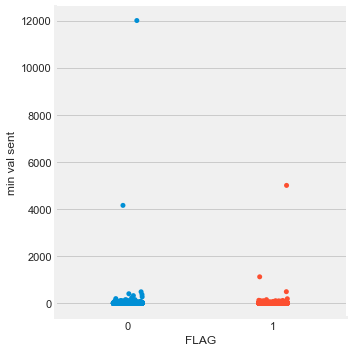

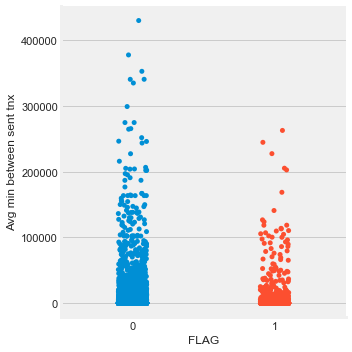

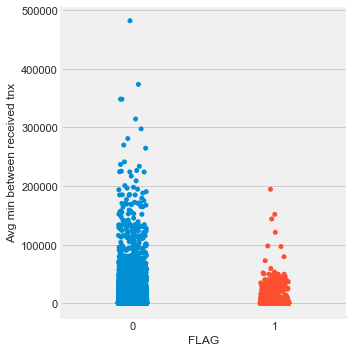

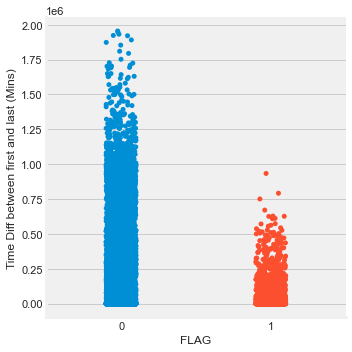

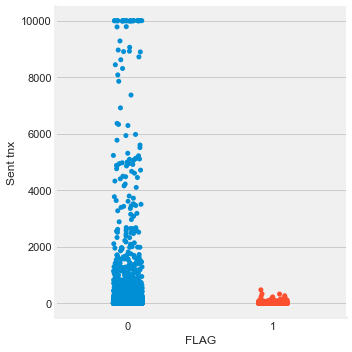

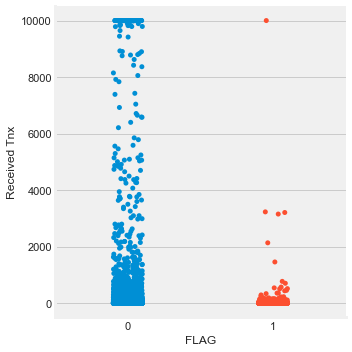

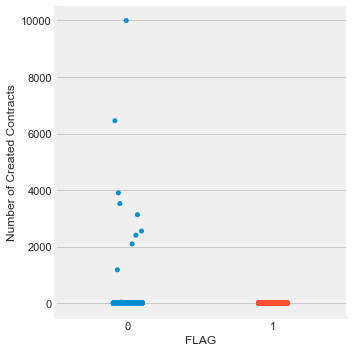

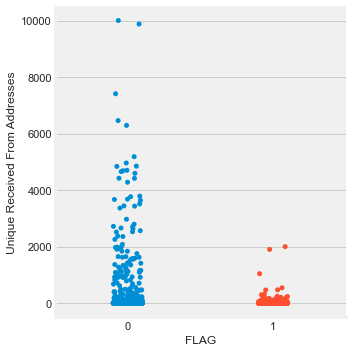

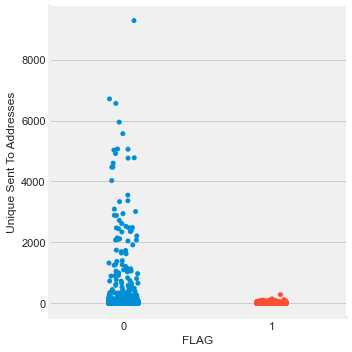

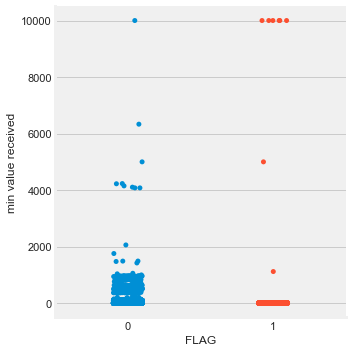

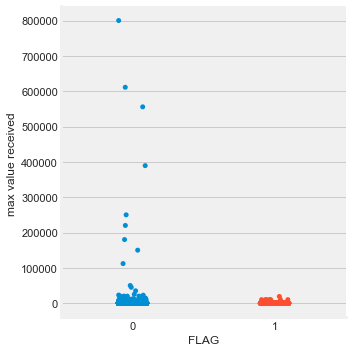

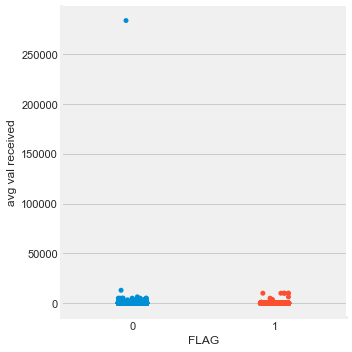

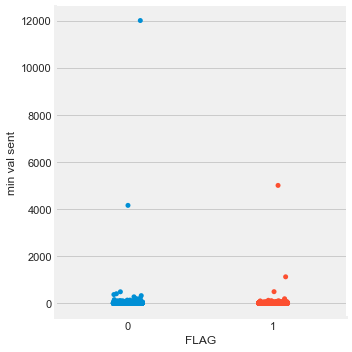

In [193]:
sns.boxplot(x='FLAG', y='Avg min between sent tnx', data=df)

plt.show()

sns.boxplot(x='FLAG', y='Avg min between received tnx', data=df)

plt.show()

sns.boxplot(x='FLAG', y='Time Diff between first and last (Mins)', data=df)

plt.show()

sns.boxplot(x='FLAG', y='Sent tnx', data=df)

plt.show()

sns.boxplot(x='FLAG', y='Received Tnx', data=df)

plt.show()

sns.boxplot(x='FLAG', y='Number of Created Contracts', data=df)

plt.show()

sns.boxplot(x='FLAG', y='Unique Received From Addresses', data=df)

plt.show() 

sns.boxplot(x='FLAG', y='Unique Sent To Addresses', data=df)

plt.show() 

sns.boxplot(x='FLAG', y='min value received', data=df)

plt.show() 

sns.boxplot(x='FLAG', y='max value received ', data=df)

plt.show() 

sns.boxplot(x='FLAG', y='avg val received', data=df)

plt.show() 

sns.boxplot(x='FLAG', y='min val sent', data=df)

plt.show() 

sns.catplot(x='FLAG', y='min val sent', data=df)

sns.catplot(x='FLAG', y='Avg min between sent tnx', data=df)

plt.show()

sns.catplot(x='FLAG', y='Avg min between received tnx', data=df)

plt.show()

sns.catplot(x='FLAG', y='Time Diff between first and last (Mins)', data=df)

plt.show()

sns.catplot(x='FLAG', y='Sent tnx', data=df)

plt.show()

sns.catplot(x='FLAG', y='Received Tnx', data=df)

plt.show()

sns.catplot(x='FLAG', y='Number of Created Contracts', data=df)

plt.show()



sns.catplot(x='FLAG', y='Unique Received From Addresses', data=df)
plt.show() 

sns.catplot(x='FLAG', y='Unique Sent To Addresses', data=df)
plt.show() 

sns.catplot(x='FLAG', y='min value received', data=df)
plt.show() 

sns.catplot(x='FLAG', y='max value received ', data=df)
plt.show() 

sns.catplot(x='FLAG', y='avg val received', data=df)
plt.show() 

sns.catplot(x='FLAG', y='min val sent', data=df)
plt.show() 

<p>En la mayoría de las variables tenemos pares. Es decir , un valor máximo o mínimo. Podemos observar este patrón en la mayoría,para los valores máximos tenemos muy pocos fraudes. En cambio , para los valores mínimos tenemos muchas más Fraudes.
<p>Con esto podemos llegar a concluir que la mayoría de los fraudes representan transacciones de menor costo.


## Análisis_Multivariado

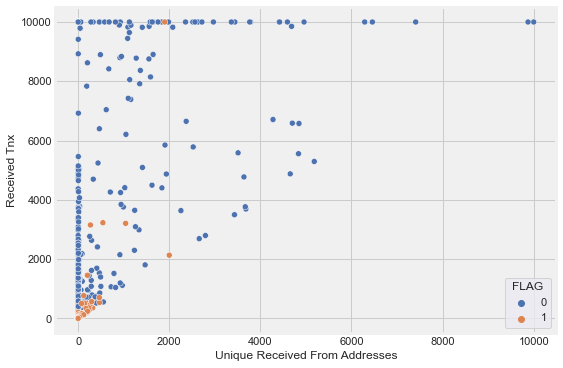

In [194]:
plt.subplots(figsize = (8, 6))
sns.set(style = 'darkgrid')
sns.scatterplot(data = df,x = 'Unique Received From Addresses', y= 'Received Tnx',hue = 'FLAG' )
plt.show()





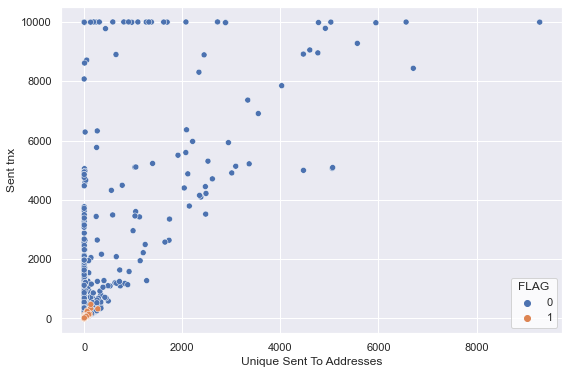

In [195]:
plt.subplots(figsize = (8, 6))
sns.set(style = 'whitegrid')
sns.scatterplot(data = df,x = 'Unique Sent To Addresses', y= 'Sent tnx',hue = 'FLAG' )
plt.show()


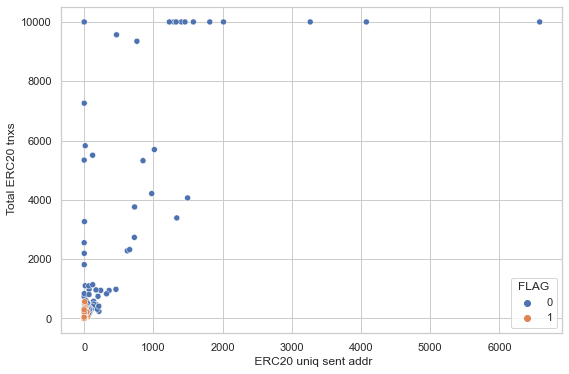

In [196]:
plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = ' ERC20 uniq sent addr', y= ' Total ERC20 tnxs',hue = 'FLAG' )
plt.show()



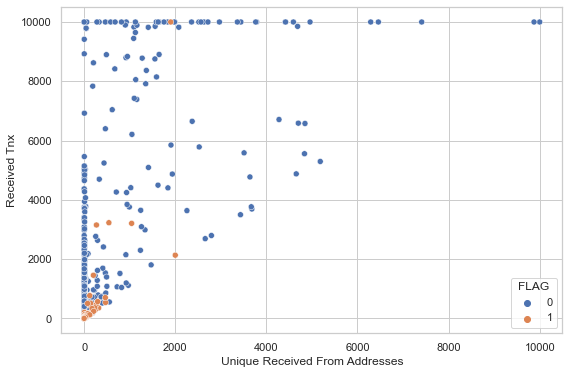

In [197]:
plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = 'Unique Received From Addresses', y= 'Received Tnx',hue = 'FLAG' )
plt.show()

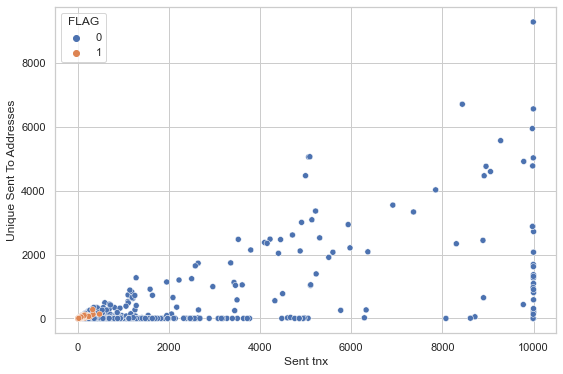

In [198]:
plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = 'Sent tnx', y= 'Unique Sent To Addresses',hue = 'FLAG' )
plt.show()



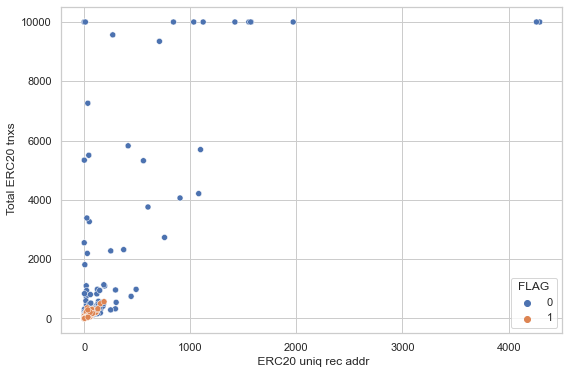

In [199]:
plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = ' ERC20 uniq rec addr', y= ' Total ERC20 tnxs',hue = 'FLAG' )
plt.show()




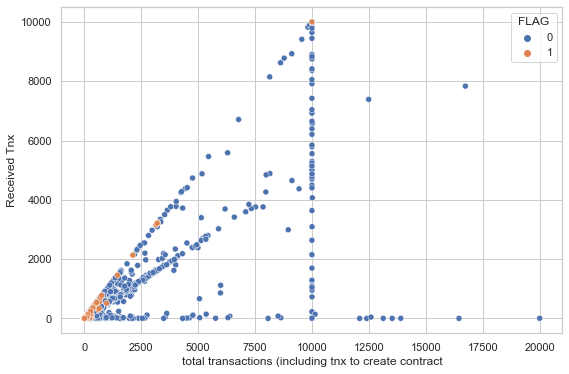

In [200]:
plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = 'total transactions (including tnx to create contract', y= 'Received Tnx',hue = 'FLAG' )
plt.show()




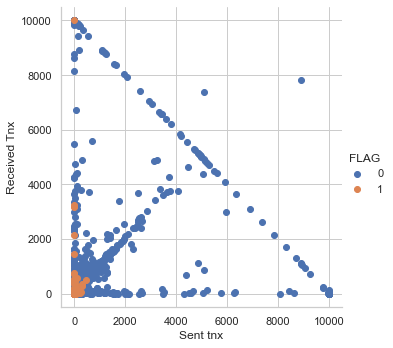

In [201]:
#Analizo la variable target vs los envios de trx y las recividas
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter,'Sent tnx','Received Tnx').add_legend();


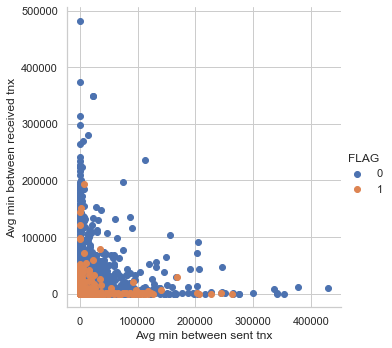

In [202]:
#Analizo la variable targer vs el promedio minimo de enviados y recibidos
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter,'Avg min between sent tnx','Avg min between received tnx').add_legend();

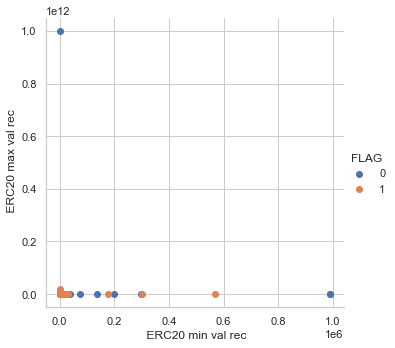

In [203]:
#Analizo la variable target vs ERC20 min val rec y ERC20 max val rec
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter,' ERC20 min val rec',' ERC20 max val rec').add_legend();

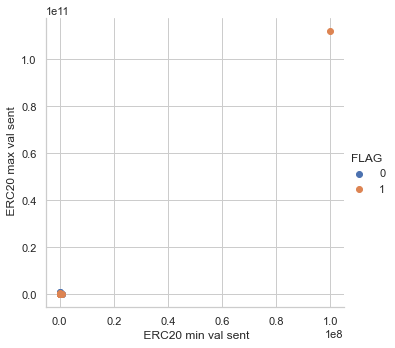

In [204]:
#Analizo la variable target vs ERC20 min val sent y ERC20 max val sent
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter, ' ERC20 min val sent',' ERC20 max val sent').add_legend();


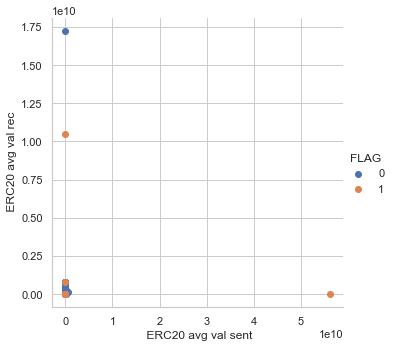

In [205]:
#Analizo la variable target vs ERC20 avg val sent y ERC20 avg val rec
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter, ' ERC20 avg val sent',' ERC20 avg val rec').add_legend();


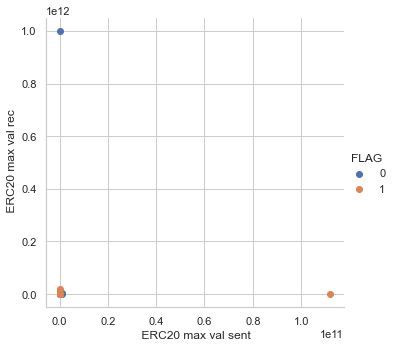

In [206]:
#Analizo la variable target vs ERC20 max val sent y ERC20 max val rec
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter, ' ERC20 max val sent',' ERC20 max val rec').add_legend();

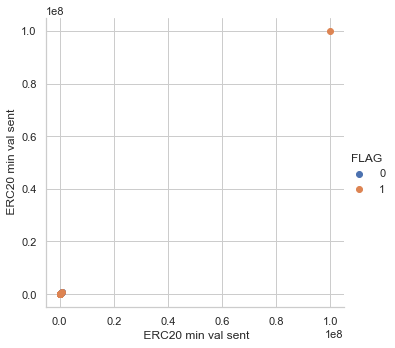

In [207]:
#Analizo la variable target vs ERC20 min val sent y ERC20 min val rec
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter, ' ERC20 min val sent',' ERC20 min val sent').add_legend();

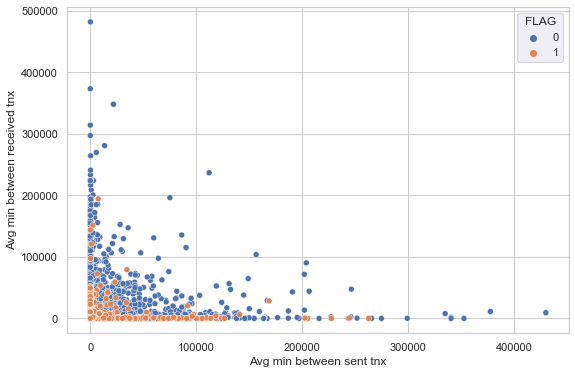

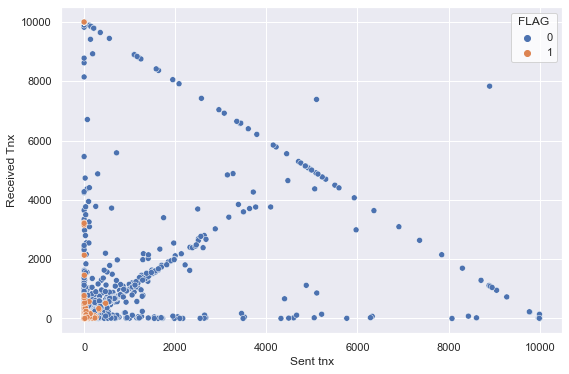

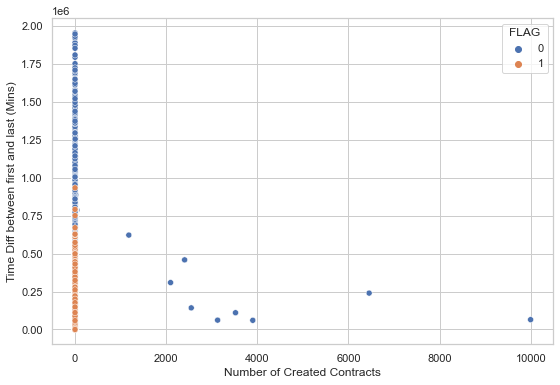

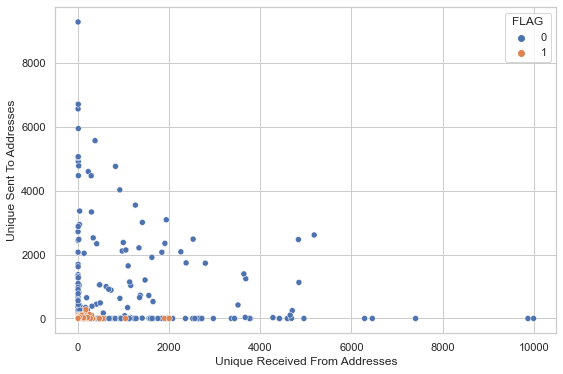

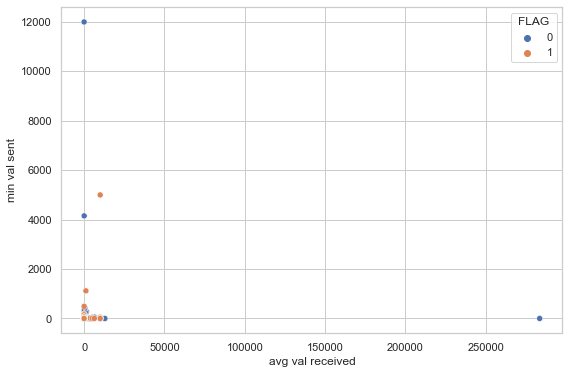

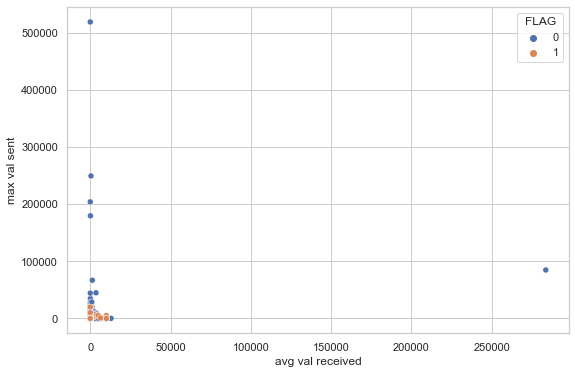

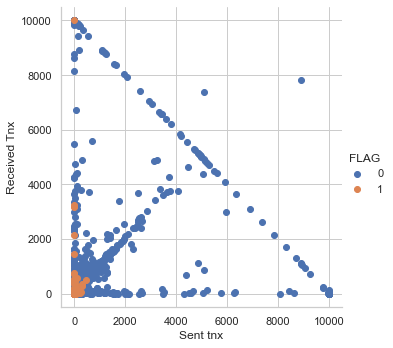

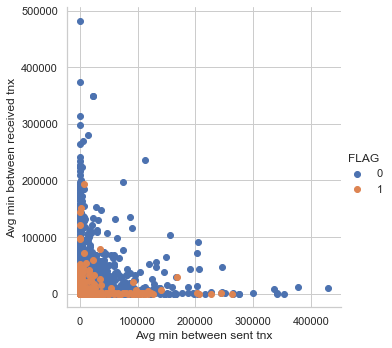

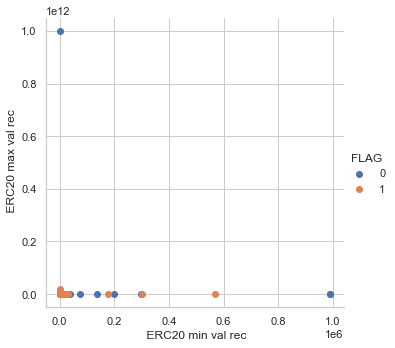

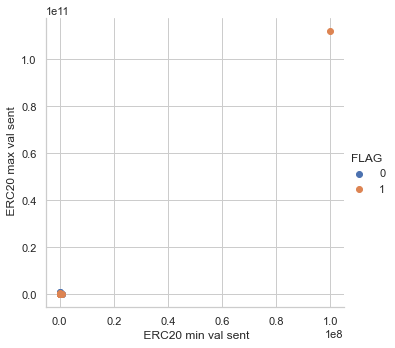

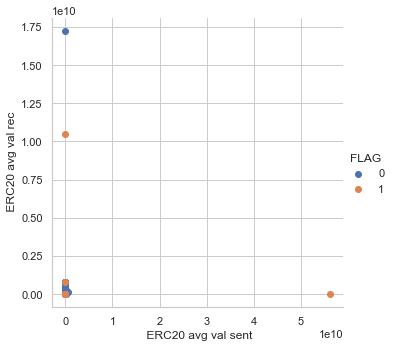

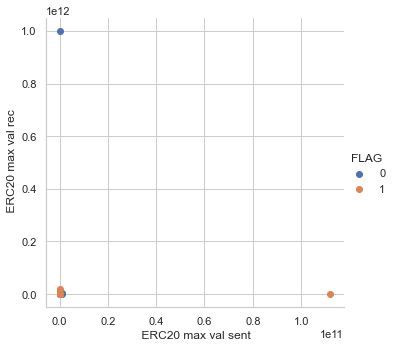

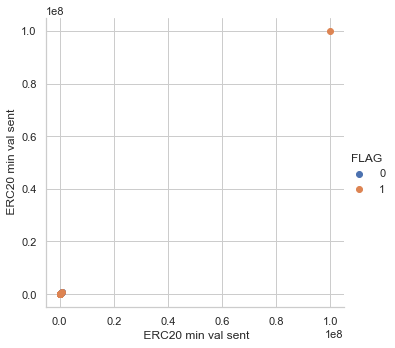

In [208]:
#Comienzo a Analizar  las sigueintes variables
#'Avg min between sent tnx',
#'Avg min between received tnx', 

# 'Time Diff between first and last (Mins)', 

#'Sent tnx', 'Received Tnx',        
#'Number of Created Contracts', 
#'Unique Received From Addresses',
#'Unique Sent To Addresses', 
#'min value received', 
#'max value received ',  
#'avg val received', 
#'min val sent', 
#'max val sent', 
#'avg val sent',        


plt.subplots(figsize = (8, 6))
sns.set(style = 'darkgrid')
sns.scatterplot(data = df,x = 'Avg min between sent tnx', y= 'Avg min between received tnx',hue = 'FLAG' )
plt.show()

plt.subplots(figsize = (8, 6))
sns.set(style = 'whitegrid')
sns.scatterplot(data = df,x = 'Sent tnx', y= 'Received Tnx',hue = 'FLAG' )
plt.show()

plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = 'Number of Created Contracts', y= 'Time Diff between first and last (Mins)',hue = 'FLAG' )
plt.show()


plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = 'Unique Received From Addresses', y= 'Unique Sent To Addresses',hue = 'FLAG' )
plt.show()

plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = 'avg val received', y= 'min val sent',hue = 'FLAG' )
plt.show()

plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = 'avg val received', y= 'max val sent',hue = 'FLAG' )
plt.show()


#Analizo la variable target vs los envios de trx y las recividas
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter,'Sent tnx','Received Tnx').add_legend();


#Analizo la variable targer vs el promedio minimo de enviados y recibidos
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter,'Avg min between sent tnx','Avg min between received tnx').add_legend();

#Analizo la variable target vs ERC20 min val rec y ERC20 max val rec
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter,' ERC20 min val rec',' ERC20 max val rec').add_legend();

#Analizo la variable target vs ERC20 min val sent y ERC20 max val sent
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter, ' ERC20 min val sent',' ERC20 max val sent').add_legend();


#Analizo la variable target vs ERC20 avg val sent y ERC20 avg val rec
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter, ' ERC20 avg val sent',' ERC20 avg val rec').add_legend();


#Analizo la variable target vs ERC20 max val sent y ERC20 max val rec
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter, ' ERC20 max val sent',' ERC20 max val rec').add_legend();

#Analizo la variable target vs ERC20 min val sent y ERC20 min val rec
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter, ' ERC20 min val sent',' ERC20 min val sent').add_legend();

Con todo el análisis multivariado que realizamos, podemos concluir que los fraudes se van en la mayoría de los valores mínimos , es decir, que más tienden a cero.
Podemos marcar más esta tendencia generan indicadores de corte


## Regresion Logistica para Potenciar el Analisis Multivariado

In [209]:
#Dropeamos las columnas que son insignificativas y no aportan valor. 
columns = ['Unnamed: 0', 'Index', 'Address',' ERC20 avg time between contract tnx',
' ERC20 avg time between rec 2 tnx',
' ERC20 avg val sent contract',
' ERC20 max val sent contract',
' ERC20 min val sent contract',
' ERC20 avg time between rec tnx',
' ERC20 avg time between sent tnx',
'min value sent to contract',
'total ether sent contracts',
'avg value sent to contract',
'max val sent to contract',
' ERC20 total Ether sent contract',
' ERC20 uniq sent addr.1',' ERC20 most sent token type', ' ERC20_most_rec_token_type']

df_RL.drop(columns, axis =1 , inplace = True)

In [210]:
# Split train and target features

df_RL.fillna(0, inplace = True)
y = df_RL['FLAG']
X = df_RL.drop(['FLAG'], axis=1)

# Standardize the train and test sample
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
import sklearn.linear_model as lm
# Perform GridSearchCV to tune best-fit LR model
param = {'C': [10**-2,10**-1,10**0,10**1,10**2]}

#Separo data en sets de training y test 70/30
X_train_LG, X_test_LG, y_train_LG, y_test_LG = train_test_split(X, y, test_size = 0.30, random_state = 43) #---> ver si es correcto el random_state


lr_model = LogisticRegression(penalty='l1', solver='liblinear')
gs_model = GridSearchCV(estimator=lr_model, param_grid=param)
gs_model.fit(X_train_LG, y_train_LG)


# Train a LR model with best parameters
model = LogisticRegression(**gs_model.best_params_, penalty='l1', solver='liblinear')
model.fit(X_train_LG, y_train_LG)


C:\Users\CRYSTAL\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\CRYSTAL\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\CRYSTAL\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\CRYSTAL\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\CRYSTAL\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of 

In [ ]:
#Vemos el coeficiente entre variables
coef = model.coef_[0]
coef
print("Columnas que no tiene importancia en el dataset:")
print(list(pd.Series(X_train_LG.columns)[list(coef==0)]))



In [ ]:
X_train_LG.columns

Podemos determinar que casi todas las variables del data set son importantes y no tiene coefientes en cero. 

## Indicadores

<p>En base al análisis multivariado se generaron indicadores de corte 

<ul>    
<li>FLAG_RECEIVED_VS_RECEIVED_ADRESS : Indicador de corte para las variables : Received Tnx , Unique Received From Addresses , FLAG </li>
<li>FLAG_SENT_ADRR_VS_SENT_TRX : Indicador de corte para las variables : Unique Sent To Addresses , Sent tnx ,FLAG </li>
<li>FLAG_ERC20UNIQ_VS_ERC20_TNXS : Indicador de corte para las variables : ERC20 uniq sent addr , Total ERC20 tnxs , FLAG </li>
<li>FLAG_TOTAL_TRX_VS_RECEIVED_TNX : Indicador de corte para las variables : total transactions (including tnx to create contract, Received Tnx, FLAG </li>
</ul> 


In [ ]:
df['FLAG_RECEIVED_VS_RECEIVED_ADRESS']  = np.where((df['Received Tnx'] > 4000) &  (df['Unique Received From Addresses'] > 2000) ,1,0) 
df['FLAG_RECEIVED_VS_RECEIVED_ADRESS'].value_counts()



FLAG_RECEIVED_VS_RECEIVED_ADRESS : 
    Indicador de corte para las variables : Received Tnx , Unique Received From Addresses , FLAG

In [ ]:
df['FLAG_SENT_ADRR_VS_SENT_TRX'] = np.where((df['Unique Sent To Addresses'] > 2000) & (df['Sent tnx'] > 2000),1,0)
df['FLAG_SENT_ADRR_VS_SENT_TRX'].value_counts()

FLAG_SENT_ADRR_VS_SENT_TRX : 
 Indicador de corte para las variables : Unique Sent To Addresses , Sent tnx ,FLAG

In [ ]:
df['FLAG_ERC20UNIQ_VS_ERC20_TNXS'] = np.where((df[' ERC20 uniq sent addr'] > 1000) & (df[' Total ERC20 tnxs'] > 2000),1,0)
df['FLAG_ERC20UNIQ_VS_ERC20_TNXS'].value_counts()

FLAG_ERC20UNIQ_VS_ERC20_TNXS :  Indicador de corte para las variables : ERC20 uniq sent addr , Total ERC20 tnxs , FLAG

In [ ]:
df['FLAG_TOTAL_TRX_VS_RECEIVED_TNX'] = np.where((df['total transactions (including tnx to create contract'] > 3250) & (df['Received Tnx'] > 4000),1,0)
df['FLAG_TOTAL_TRX_VS_RECEIVED_TNX'].value_counts()


In [ ]:
complete_df = df.copy()

FLAG_TOTAL_TRX_VS_RECEIVED_TNX : Indicador de corte para las variables : total transactions (including tnx to create contract, Received Tnx, FLAG

## Valores extremos

Uno de los puntos que encontramos en el dataset y que se evidencia en los análisis Bivariado y multivariado es que tenemos valores extremos en el data set. Revisando las variables no hay una razón en particular por que las variables no podrían tener esos valores. Por lo tanto decidimos hacer los modelos con dos datasets quitando los valores extremos y dejándolos. 

Para este ejercicio decidimos utilizar el IQR para quitar estos valores extremos. 

In [ ]:
# Miramos cuantos datos y variables tenemos
print(df.shape)

# Dado que unas variables son categoricas y el IQR se utiliza en variables continuas las vamos a poner en una lista
categorical_variables = ['FLAG_RECEIVED_VS_RECEIVED_ADRESS', 'FLAG_SENT_ADRR_VS_SENT_TRX', 'FLAG_ERC20UNIQ_VS_ERC20_TNXS',
                         'FLAG_TOTAL_TRX_VS_RECEIVED_TNX',' ERC20 most sent token type',' ERC20_most_rec_token_type' ]

# Hacemos una copia del dataset con todos los datos
reduced_df = df.copy()
print(reduced_df.shape)

In [ ]:
#https://towardsdatascience.com/practical-implementation-of-outlier-detection-in-python-90680453b3ce

median_df = reduced_df.describe().loc[['25%', '75%']].transpose()
median_df['IQR'] = median_df['75%'] - median_df['25%']

#df_final=work_df
for (columnName, columnData) in median_df.T.iteritems():
    
    print('Column Name : ', columnName)
    #print('Column Contents : ', columnData['75%'])
    
    Q1 = columnData['25%']
    Q3 = columnData['75%']
    IQR = columnData['IQR']
    
    if IQR >=1 and columnName not in categorical_variables:
        reduced_df=reduced_df[~((reduced_df[columnName]<(Q1-1.5*IQR)) | (reduced_df[columnName]>(Q3+1.5*IQR)))]
        print(reduced_df.shape)
        #print('Column Contents : ', columnData)
        print('\n')
    else:
        #print('Column Contents : ', columnData)
        print("Pass..")
        print('\n')

reduced_df.shape     

In [ ]:
print(f'Procentaje de transacciones no fraudulentas : {len(reduced_df.loc[df["FLAG"]==0])/len(reduced_df["FLAG"])*100}')
print(f'Procentaje de transacciones fraudulentas : {len(reduced_df.loc[df["FLAG"]==1])/len(reduced_df["FLAG"])*100}')

In [ ]:
pie, ax = plt.subplots(figsize=[15,10])
labels = ['No Fraude', 'Fraude']
colors = ['#f9ae35', '#f64e38']
plt.pie(x = reduced_df['FLAG'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Distribucion de la columna Target')


#TODO no se por que no me lo muestra

Podemos ver que el numeor de records se redujo a 2676, pero adicionalmente a eso vemos que el dataset quedo mas balanceado con un 53% de No fraude vs un 46% de Fraude. Esto nos ayudo adicionalmente a balancear el dataset. 

#### !!! Importante !!! El dataset reducido (reduced_df) es el que no tiene los valores extremos y el completo (complete_df) es el que sí tiene todos los datos 

### A continuacion pondremos a prueba varios algoritmos (Supervisado  y no supervidaos) con ambos data set ( el completo y el reducido)

## Algoritmos No supervisados

Un analisis adicional que decidimos hacer es entrenar un modelo no supervidado para usar las respuestas como otra variable en nuestro modelo. 

In [ ]:
#https://realpython.com/k-means-clustering-python/

def KMeans_elbow_point(work_df):
    
    #work_df = complete_df.copy()
    work_df = work_df.drop(['FLAG', ' ERC20 most sent token type', ' ERC20_most_rec_token_type'], axis = 1) 
    work_df.fillna(0, inplace = True)

    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(work_df)

    kmeans_kwargs = {
        "init": "k-means++",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }

    # A list holds the SSE values for each k
    sse = []
    for k in range(1, 30):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(scaled_features)
        sse.append(kmeans.inertia_)

    plt.style.use("fivethirtyeight")
    plt.plot(range(1, 30), sse)
    plt.xticks(range(1, 30))
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE")
    plt.show()

Construimos una función para crear el gráfico de codo y poder decidir cuantos cluster se deberían usar en cada dataset.

In [ ]:
KMeans_elbow_point(reduced_df)

# Se puede decir que se deben usar 8 clusters para el dataset reducido

In [ ]:
KMeans_elbow_point(complete_df)

# Se puede decir que se deben usar 19 clusters para el dataset completo

In [ ]:
def KMeans_feature(work_df, k_groups):
    original_df = work_df.copy()
    work_df = work_df.drop(['FLAG', ' ERC20 most sent token type', ' ERC20_most_rec_token_type'], axis = 1) 
    work_df.fillna(0, inplace = True)

    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(work_df)

    kmeans_kwargs = {
        "init": "k-means++",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }

    kmeans = KMeans(n_clusters=k_groups, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    y_kmeans = kmeans.predict(scaled_features)

    original_df['kMeans_Group'] = np.array(y_kmeans)
    
    return original_df

In [ ]:
print(f"Complete Shape: {complete_df.shape}")
print(f"Reduced Shape: {reduced_df.shape}")

In [ ]:
complete_df = KMeans_feature(complete_df, 19)
complete_df.shape

In [ ]:
reduced_df = KMeans_feature(reduced_df, 8)
reduced_df.shape

Se ve como a los dos datasets se les agregó una nueva variable llamada 'kMeans_Group' que es el resultado del algoritmo no supervisado




# Aplicamos  algoritmos de clasificación al Dataset completo

## Arbol de Decisiones

In [ ]:
df.columns

In [ ]:
complete_df.fillna(0, inplace = True)

In [ ]:
X = complete_df.drop(['FLAG', ' ERC20 most sent token type', ' ERC20_most_rec_token_type', ], axis = 1) 
#Todo el Dataset excepto FLAG que es la variable objetivo y variables no numericas o categoricas que descartamos por no aportar insight
y = complete_df['FLAG'] 

In [ ]:
X.fillna(0, inplace = True) #Termino de limpiar

In [ ]:
X

In [ ]:
#Separo data en sets de training y test 70/30
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(X, y, test_size = 0.30, random_state = 43) #---> ver si es correcto el random_state

In [ ]:
tree = DecisionTreeClassifier(max_depth = 2, random_state = 42)

In [ ]:
tree.fit(X_train_DT, y_train_DT)

In [ ]:
y_train_predict_DT = tree.predict(X_train_DT)
y_test_pred_DT = tree.predict(X_test_DT)

In [ ]:
train_acurracy = accuracy_score(y_train_DT, y_train_predict_DT)
test_acurracy = accuracy_score(y_test_DT, y_test_pred_DT)

In [ ]:
train_acurracy 

In [ ]:
test_acurracy

## Random Forest

In [ ]:
X2 = complete_df.drop(['FLAG', ' ERC20 most sent token type', ' ERC20_most_rec_token_type'], axis = 1) 
#Todo el Dataset excepto FLAG que es la variable objetivo y variables no numericas o categoricas que descartamos por no aportar insight
y2 = complete_df['FLAG'] 

In [ ]:
X2.fillna(0, inplace = True) #Termino de limpiar

In [ ]:
#Separo data en sets de training y test 70/30
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(X2, y2, test_size = 0.30, random_state = 43)

In [ ]:
#Creamos un random forest!
model2 = RandomForestClassifier(random_state=11, n_estimators=200, class_weight="balanced", max_features="log2")

In [ ]:
model2.fit(X_train_RF, y_train_RF)

In [ ]:
y_test_pred_RF = model2.predict(X_test_RF)

In [ ]:
#Calculo el accuracy en Test
test_accuracy2 = accuracy_score(y_test_RF, y_test_pred_RF)

print('% de aciertos sobre el set de evaluación:',test_accuracy2)

# KNN


In [ ]:
X3 = complete_df.drop(['FLAG', ' ERC20 most sent token type', ' ERC20_most_rec_token_type'], axis = 1) 
#Todo el Dataset excepto FLAG que es la variable objetivo y variables no numericas o categoricas que descartamos por no aportar insight
y3 = complete_df['FLAG']

In [ ]:
#Separo data en sets de training y test 70/30
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(X3, y3, test_size = 0.30, random_state = 43)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_KNN, y_train_KNN)

In [ ]:
y_test_pred_KNN = knn.predict(X_test_KNN)

In [ ]:
#Calculo el accuracy en Test
test_accuracy2 = accuracy_score(y_test_KNN, y_test_pred_KNN)

print('% de aciertos sobre el set de evaluación:',test_accuracy2)

# XGBoost

In [ ]:
X4 = complete_df.drop(['FLAG', ' ERC20 most sent token type', ' ERC20_most_rec_token_type'], axis = 1) 
#Todo el Dataset excepto FLAG que es la variable objetivo y variables no numericas o categoricas que descartamos por no aportar insight
y4 = complete_df['FLAG'] 

In [ ]:
X4.fillna(0, inplace = True) #Termino de limpiar

In [ ]:
#Separo data en sets de training y test 70/30
X_train_XG, X_test_XG, y_train_XG, y_test_XG = train_test_split(X4, y4, test_size = 0.30, random_state = 43)

In [ ]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10,
                            seed=123)


In [ ]:
clf_xgb.fit(X_train_XG, y_train_XG)


In [ ]:
preds_xgb = clf_xgb.predict(X_test_XG)

In [ ]:
accuracy_xgb = float(np.sum(preds_xgb == y_test_XG))/y_test_XG.shape[0]
print('Accuracy de XGBoost: ', accuracy_xgb)

# Aplicamos algoritmos de clasificación al Dataset reducido

# Arbol de Decisiones (Dataset Reducido)

In [ ]:
reduced_df.fillna(0, inplace = True)

In [ ]:
X_reduce = reduced_df.drop(['FLAG', ' ERC20 most sent token type', ' ERC20_most_rec_token_type', ], axis = 1) 
#Todo el Dataset excepto FLAG que es la variable objetivo y variables no numericas o categoricas que descartamos por no aportar insight
y_reduce = reduced_df['FLAG'] 

In [ ]:
X_reduce.fillna(0, inplace = True) #Termino de limpiar

In [ ]:
X_reduce

In [ ]:
#Separo data en sets de training y test 70/30
X_train_DT_reduce, X_test_DT_reduce, y_train_DT_reduce, y_test_DT_reduce = train_test_split(X_reduce, y_reduce, test_size = 0.30, random_state = 43) #---> ver si es correcto el random_state

In [ ]:
tree_reduce = DecisionTreeClassifier(max_depth = 2, random_state = 42)

In [ ]:
tree_reduce.fit(X_train_DT_reduce, y_train_DT_reduce)

In [ ]:
y_train_predict_DT_reduce = tree_reduce.predict(X_train_DT_reduce)
y_test_pred_DT_reduce = tree_reduce.predict(X_test_DT_reduce)

In [ ]:
train_acurracy_reduce = accuracy_score(y_train_DT_reduce, y_train_predict_DT_reduce)
test_acurracy_reduce = accuracy_score(y_test_DT_reduce, y_test_pred_DT_reduce)

In [ ]:
train_acurracy_reduce 

In [ ]:
test_acurracy_reduce

# Random Forest - Dataset reducido


In [ ]:
X2_reduce = reduced_df.drop(['FLAG', ' ERC20 most sent token type', ' ERC20_most_rec_token_type'], axis = 1) 
#Todo el Dataset excepto FLAG que es la variable objetivo y variables no numericas o categoricas que descartamos por no aportar insight
y2_reduce = reduced_df['FLAG'] 

In [ ]:
X2_reduce.fillna(0, inplace = True) #Termino de limpiar

In [ ]:

#Separo data en sets de training y test 70/30
X_train_RF_reduce, X_test_RF_reduce, y_train_RF_reduce, y_test_RF_reduce = train_test_split(X2_reduce, y2_reduce, test_size = 0.30, random_state = 43)

In [ ]:

#Creamos un random forest!
Modelo_RF_reduce = RandomForestClassifier(random_state=11, n_estimators=200, class_weight="balanced", max_features="log2")

In [ ]:
Modelo_RF_reduce.fit(X_train_RF_reduce, y_train_RF_reduce)

In [ ]:
y_test_pred_RF_reduce = Modelo_RF_reduce.predict(X_test_RF_reduce)

In [ ]:
#Calculo el accuracy en Test
test_accuracy2_reduce = accuracy_score(y_test_RF_reduce, y_test_pred_RF_reduce)

print('% de aciertos sobre el set de evaluación:',test_accuracy2_reduce)

# KNN - Dataset reducido


In [ ]:
X3_reduce = reduced_df.drop(['FLAG', ' ERC20 most sent token type', ' ERC20_most_rec_token_type'], axis = 1) 
#Todo el Dataset excepto FLAG que es la variable objetivo y variables no numericas o categoricas que descartamos por no aportar insight
y3_reduce = reduced_df['FLAG']

In [ ]:
#Separo data en sets de training y test 70/30
X_train_KNN_reduce, X_test_KNN_reduce, y_train_KNN_reduce, y_test_KNN_reduce = train_test_split(X3_reduce, y3_reduce, test_size = 0.30, random_state = 43)


In [ ]:
knn_reduce = KNeighborsClassifier(n_neighbors=3)
knn_reduce.fit(X_train_KNN_reduce, y_train_KNN_reduce)

In [ ]:
y_test_pred_KNN_reduce = knn_reduce.predict(X_test_KNN_reduce)

In [ ]:
#Calculo el accuracy en Test
test_accuracy2_reduce = accuracy_score(y_test_KNN_reduce, y_test_pred_KNN_reduce)

print('% de aciertos sobre el set de evaluación:',test_accuracy2_reduce)

# XGBoost  - Dataset reducido

In [ ]:
X4_reduce = reduced_df.drop(['FLAG', ' ERC20 most sent token type', ' ERC20_most_rec_token_type'], axis = 1) 
#Todo el Dataset excepto FLAG que es la variable objetivo y variables no numericas o categoricas que descartamos por no aportar insight
y4_reduce = reduced_df['FLAG'] 



In [ ]:
X4_reduce.fillna(0, inplace = True) #Termino de limpiar



In [ ]:
#Separo data en sets de training y test 70/30
X_train_XG_reduce, X_test_XG_reduce, y_train_XG_reduce, y_test_XG_reduce = train_test_split(X4_reduce, y4_reduce, test_size = 0.30, random_state = 43)


In [ ]:
clf_xgb_reduce = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10,
                            seed=123)


In [ ]:
clf_xgb_reduce.fit(X_train_XG_reduce, y_train_XG_reduce)

In [ ]:
preds_xgb_reduce = clf_xgb_reduce.predict(X_test_XG_reduce)

In [ ]:
accuracy_xgb_reduce = float(np.sum(preds_xgb_reduce == y_test_XG_reduce))/y_test_XG_reduce.shape[0]
print('Accuracy de XGBoost: ', accuracy_xgb_reduce)

# Validacion de modelos y seleccion

In [ ]:
#Accuracy de los modelos 

print("Modelos con el data set completo")
print("")
print(f"Accuracy of the RF classifier is: {accuracy_score(y_test_RF, y_test_pred_RF )}")
print(f"Accuracy of the DT classifier is: {accuracy_score(y_test_DT, y_test_pred_DT )}")
print(f"Accuracy of the KNN classifier is: {accuracy_score(y_test_KNN, y_test_pred_KNN )}")
print(f"Accuracy of the XGBoost classifier is: {accuracy_score(y_test_XG, preds_xgb )}")
print("")
print("Modelos con el data set reducido")
print("")
print(f"Accuracy of the RF classifier is: {accuracy_score(y_test_RF_reduce, y_test_pred_RF_reduce )}")
print(f"Accuracy of the DT classifier is: {accuracy_score(y_test_DT_reduce, y_test_pred_DT_reduce )}")
print(f"Accuracy of the KNN classifier is: {accuracy_score(y_test_KNN_reduce, y_test_pred_KNN_reduce )}")
print(f"Accuracy of the XGBoost classifier is: {accuracy_score(y_test_XG_reduce, preds_xgb_reduce )}")


In [ ]:
#precision_score de los modelos
print("Modelos con el data set completo")
print("")
print(f"precision_score of the RF classifier is: {precision_score(y_test_RF, y_test_pred_RF )}")
print(f"precision_score of the DF classifier is: {precision_score(y_test_DT, y_test_pred_DT )}")
print(f"precision_score of the KNN classifier is: {precision_score(y_test_KNN, y_test_pred_KNN )}")
print(f"precision_score of the XGBoost classifier is: {precision_score(y_test_XG, preds_xgb )}")
print("")
print("Modelos con el data set reducido")
print("")
print(f"precision_score of the RF classifier is: {precision_score(y_test_RF_reduce, y_test_pred_RF_reduce )}")
print(f"precision_score of the DF classifier is: {precision_score(y_test_DT_reduce, y_test_pred_DT_reduce )}")
print(f"precision_score of the KNN classifier is: {precision_score(y_test_KNN_reduce, y_test_pred_KNN_reduce )}")
print(f"precision_score of the XGBoost classifier is: {precision_score(y_test_XG_reduce, preds_xgb_reduce )}")


In [ ]:
#recall_score de los modelos
print("Modelos con el data set completo")
print("")
print(f"recall_score of the RF classifier is: {recall_score(y_test_RF, y_test_pred_RF )}")
print(f"recall_score of the DT classifier is: {recall_score(y_test_DT, y_test_pred_DT )}")
print(f"recall_score of the KNN classifier is: {recall_score(y_test_KNN, y_test_pred_KNN)}")
print(f"recall_score of the XGBoost classifier is: {recall_score(y_test_XG, preds_xgb)}")
print("")
print("Modelos con el data set reducido")
print("")
print(f"recall_score of the RF classifier is: {recall_score(y_test_RF_reduce, y_test_pred_RF_reduce )}")
print(f"recall_score of the DT classifier is: {recall_score(y_test_DT_reduce, y_test_pred_DT_reduce )}")
print(f"recall_score of the KNN classifier is: {recall_score(y_test_KNN_reduce, y_test_pred_KNN_reduce )}")
print(f"recall_score of the XGBoost classifier is: {recall_score(y_test_XG_reduce, preds_xgb_reduce)}")

In [ ]:
#f1_score de los modelos

print("Modelos con el data set completo")
print("")
print(f"f1_score of the RF classifier is: {f1_score(y_test_RF, y_test_pred_RF )}")
print(f"f1_score of the DT classifier is: {f1_score(y_test_DT, y_test_pred_DT )}")
print(f"f1_score of the KNN classifier is: {f1_score(y_test_KNN, y_test_pred_KNN )}")
print(f"f1_score of the XGBoost classifier is: {f1_score(y_test_XG, preds_xgb )}")
print("")
print("Modelos con el data set reducido")
print("")
print(f"f1_score of the RF classifier is: {f1_score(y_test_RF_reduce, y_test_pred_RF_reduce )}")
print(f"f1_score of the DT classifier is: {f1_score(y_test_DT_reduce, y_test_pred_DT_reduce )}")
print(f"f1_score of the KNN classifier is: {f1_score(y_test_KNN_reduce, y_test_pred_KNN_reduce )}")
print(f"f1_score of the XGBoost classifier is: {f1_score(y_test_XG_reduce, preds_xgb_reduce )}")


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Matriz de Confusión
print("Matriz de confuncion para el algoritmo seleccionado con el data set completo")
print(confusion_matrix(y_test_RF, y_test_pred_RF))

#Ploteamos la Matriz
plot_confusion_matrix(model2, X_test_RF, y_test_RF)
plt.show()

In [ ]:
#Matriz de Confusión
print("Matriz de confuncion para el algoritmo seleccionado con el data set reducido")
print(confusion_matrix(y_test_RF_reduce, y_test_pred_RF_reduce))

#Ploteamos la Matriz
plot_confusion_matrix(Modelo_RF_reduce, X_test_RF_reduce, y_test_RF_reduce)
plt.show()

In [ ]:
#Curva ROC
from sklearn.metrics import roc_curve, auc

class_probabilities = tree.predict_proba(X_test_RF)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test_RF, y_test_pred_RF)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
print("ROC para el modelo seleccionado con el dataset completo")
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#Curva ROC
from sklearn.metrics import roc_curve, auc

class_probabilities = tree.predict_proba(X_test_RF_reduce)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test_RF_reduce, y_test_pred_RF_reduce)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
print("ROC para el modelo seleccionado con el dataset reducido")
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Podemos concluir dos cosas con todo este analisis y competiciones de algoritmos: 

Data sets :
1. El data set reducido , tiene solo aproximadamente el 25 porciento de registros que componen al data set original

Algoritmos:
1. Pusimos a trabajar cuatro algoritmos supervidaos con ambos data sets. Creando un modelo para cada uno de ellos. 
Analizando los resultados , podemos destacar que ambos set de datos son optimos para el algoritmo Random Forest. Fue el que mejor puntuacion tuvo para ambos data set.

2. La diferencia de metricaz entre los resultados del Random Forest para ambos data set es muy infima. El data set reducido obtiene un puntaje a penas mayor, pero solo tenemos un 25 porciento de filas en cuanto al original.

Con los cual, elegimos optar por el Algoritmo Random Forest con el set de datos completo.